In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pickle
from tqdm.auto import tqdm
import re
import time
import csv
import os

In [11]:
# 샘플 데이터: 연도별 논문의 갯수
#years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
#papers = np.array([10, 12, 15, 20, 25, 30, 40, 55, 70, 90, 120, 170, 260, 320, 350, 390, 420, 440])

In [2]:
# 로지스틱 함수 정의
def logistic_function(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# 곰페르츠 함수 정의
def gompertz_function(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))

## 2018 10대기술 검색결과 불러오기

In [7]:
# 기본 경로 지정
base_path = 'F:/cluster_test_2024/search_results_2024_06-04_combined'

# 결과를 저장할 딕셔너리 초기화
df_combined_dict = {}
df_year_only_dict = {}

# 모든 파일을 검색하여 딕셔너리에 저장
for filename in os.listdir(base_path):
    if filename.endswith('_aukey_or_abs_search_results_textinfo.csv'):
        # 파일의 전체 경로
        file_path = os.path.join(base_path, filename)
        
        # 파일명에서 '_aukey_or_abs_search_results_textinfo.csv'를 제외한 앞부분을 키로 사용
        key = filename.replace('_aukey_or_abs_search_results_textinfo.csv', '')
        
        # CSV 파일을 데이터프레임으로 읽어와 딕셔너리에 저장
        df_combined = pd.read_csv(file_path)
        df_combined_dict[key] = df_combined
        df_year_only_dict[key] = df_combined[['uid','pubyear']]

# 결과 확인
for key, df in df_year_only_dict.items():
    print(f"Key: {key}, DataFrame Shape: {df.shape}")

Key: 1-1. 금속 3D 프린팅(A-set)3, DataFrame Shape: (795, 2)
Key: 1-1. 금속 3D 프린팅(A-set)gpt, DataFrame Shape: (8014, 2)
Key: 1-1. 금속 3D 프린팅(A-set)gpt_smaller, DataFrame Shape: (710, 2)
Key: 1-2. 금속 3D 프린팅(B-set)gpt, DataFrame Shape: (959, 2)
Key: 1-2. 금속 3D 프린팅(B-set), DataFrame Shape: (5276, 2)
Key: 10. 상변화 소재 활용 열에너지 저장, DataFrame Shape: (22460, 2)
Key: 2. 신축성 전자소자, DataFrame Shape: (135734, 2)
Key: 3. 휴먼 마이크로바이옴, DataFrame Shape: (75630, 2)
Key: 4. 암 진단_예측 바이오마커, DataFrame Shape: (157015, 2)
Key: 5. 유전자 편집, DataFrame Shape: (59997, 2)
Key: 6.무선 전력 전송, DataFrame Shape: (6729, 2)
Key: 7. 초대용량 데이터 대응 광통신 기술, DataFrame Shape: (22242, 2)
Key: 7. 초대용량 데이터 대응 광통신 기술_gpt, DataFrame Shape: (1304, 2)
Key: 8. 면역세포치료, DataFrame Shape: (96932, 2)
Key: 9. 나노유체 이용 에너지 효율화, DataFrame Shape: (32067, 2)


In [9]:
df_year_only_dict['6.무선 전력 전송']

,uid,pubyear
0,WOS:000252621500008,2008
1,WOS:000258025700008,2008
2,WOS:000272266900007,2009
3,WOS:000268339100031,2009
4,WOS:000267697500048,2009
...,...,...
6724,WOS:000947678100001,2023
6725,WOS:000984243000001,2023
6726,WOS:001124167400013,2023
6727,WOS:001128031700093,2023


## logistic curve fitting

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [25]:
from scipy.optimize import curve_fit
from scipy.special import expit

In [26]:
# 로지스틱 함수 정의
#def logistic_function(x, L, x0, k):
#    return L / (1 + np.exp(-k * (x - x0)))
# 안정적인 로지스틱 함수 정의
#def logistic_function(x, L, x0, k):
#    ex = np.exp(-k * (x - x0))
#    return L / (1 + ex)
def logistic_function(x, L, x0, k):
    return L * expit(k * (x - x0))

# 곰페르츠 함수 정의
def gompertz_function(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))

1-1. 금속 3D 프린팅(A-set)3 Logistic parameters: [2.06803190e+02 2.01993851e+03 4.86636866e-01]
1-1. 금속 3D 프린팅(A-set)3 Gompertz parameters: [53.00001466  1.          0.05882353]
1-1. 금속 3D 프린팅(A-set)gpt Logistic parameters: [1.99618103e+03 2.01977600e+03 5.07524603e-01]
1-1. 금속 3D 프린팅(A-set)gpt Gompertz parameters: [4.45218810e+02 1.00000000e+00 5.88235294e-02]
1-1. 금속 3D 프린팅(A-set)gpt_smaller Logistic parameters: [1.85978157e+02 2.01989195e+03 5.01088926e-01]
1-1. 금속 3D 프린팅(A-set)gpt_smaller Gompertz parameters: [64.55001153  1.          0.1       ]
1-2. 금속 3D 프린팅(B-set)gpt Logistic parameters: [1.41262374e+02 2.01698952e+03 5.36697787e-01]
1-2. 금속 3D 프린팅(B-set)gpt Gompertz parameters: [53.27786784  1.          0.05882353]
1-2. 금속 3D 프린팅(B-set) Logistic parameters: [1.33003261e+03 2.02793814e+03 9.95758232e-02]
1-2. 금속 3D 프린팅(B-set) Gompertz parameters: [2.93113657e+02 1.00000000e+00 5.88235294e-02]
10. 상변화 소재 활용 열에너지 저장 Logistic parameters: [9.06045723e+03 2.02411561e+03 2.46749088e-01]
1

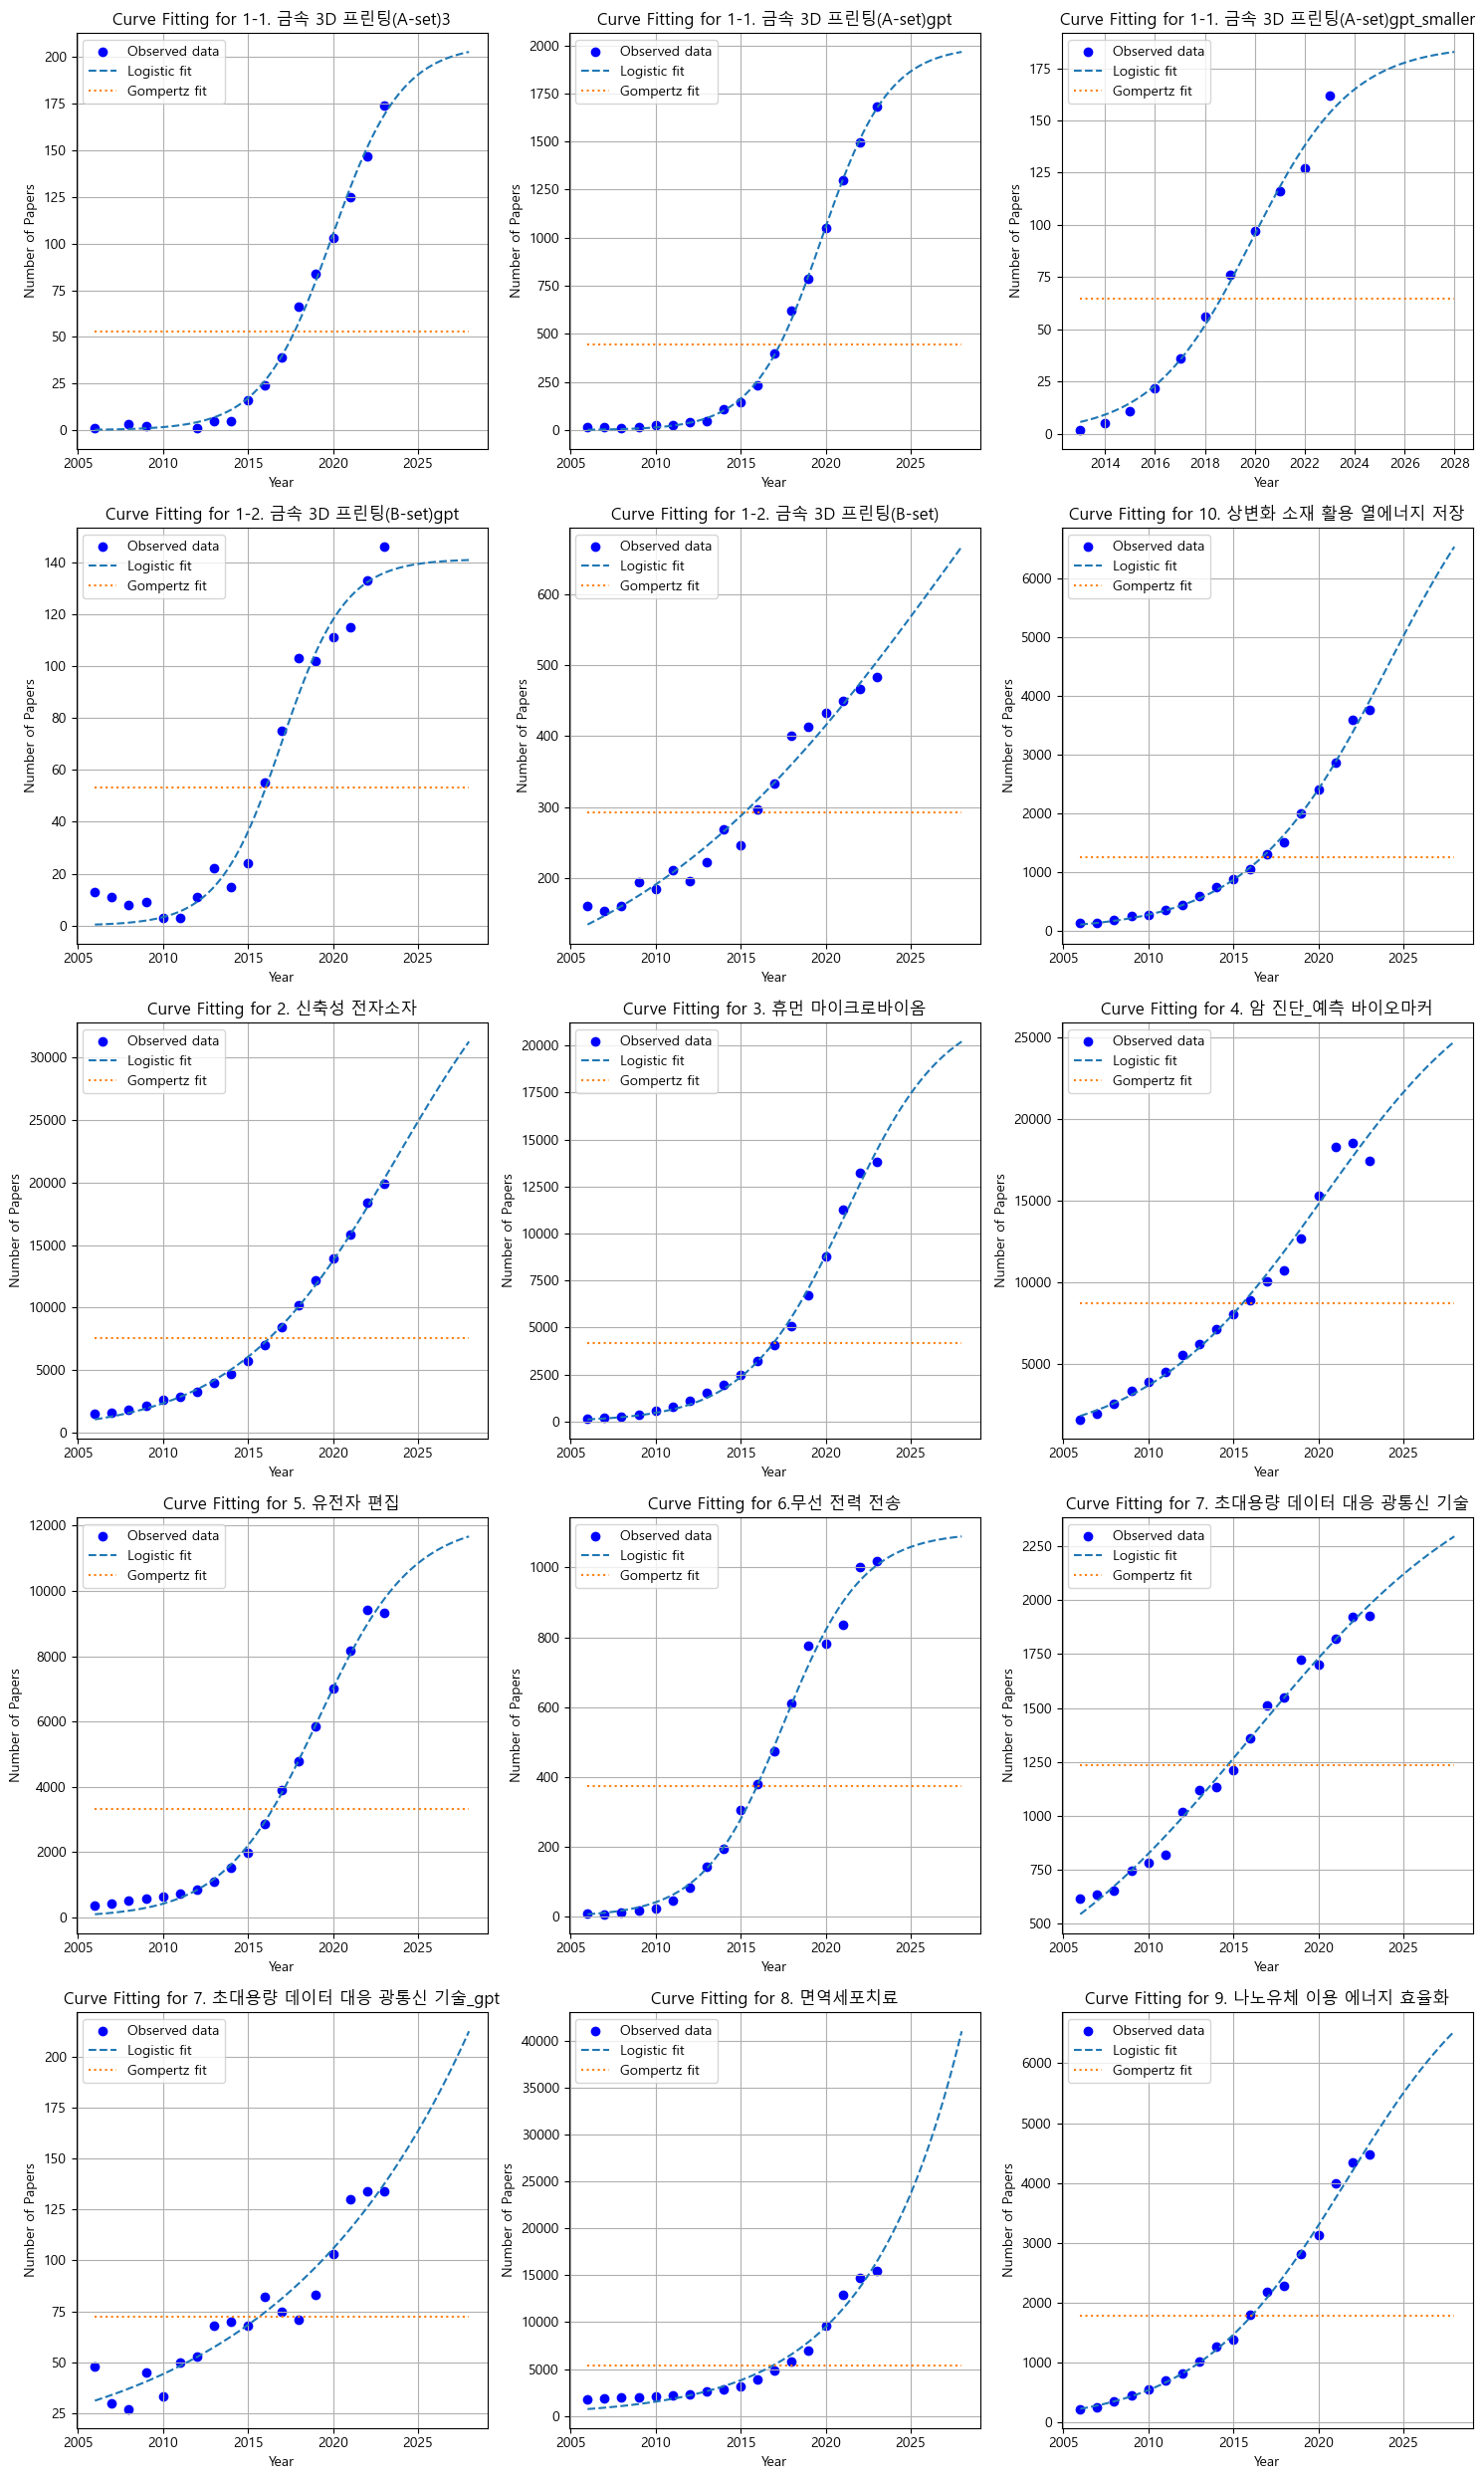

In [28]:
# 초기 파라미터 설정 (데이터에 맞게 조정)
initial_logistic_params = [120, 2005, 0.1]
initial_gompertz_params = [120, 1, 0.1]

# 최대 함수 호출 수 증가
maxfev = 10000

# 서브플롯 행과 열의 개수 설정
num_dfs = len(df_year_only_dict)
num_cols = 3
num_rows = (num_dfs + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 각 데이터프레임에 대해 피팅 수행 및 시각화
for i, (key, df) in enumerate(df_year_only_dict.items()):
    # pubyear로 그룹화하여 uid를 집계
    df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
    df_yearly.columns = ['Year', 'Papers']

    # years와 papers 추출
    years = df_yearly['Year'].values
    papers = df_yearly['Papers'].values

    # 데이터 범위에 따라 초기 파라미터 설정
    L_init = max(papers) * 1.1
    x0_init = np.median(years)
    k_init = 1 / (max(years) - min(years))
    initial_logistic_params = [L_init, x0_init, k_init]
    
    a_init = max(papers) * 1.1
    b_init = 1
    c_init = 1 / (max(years) - min(years))
    initial_gompertz_params = [a_init, b_init, c_init]    
    
    # 곡선 피팅
#    logistic_params, _ = curve_fit(logistic_function, years, papers, p0=initial_logistic_params, maxfev=maxfev, method='trf')
#    gompertz_params, _ = curve_fit(gompertz_function, years, papers, p0=initial_gompertz_params, maxfev=maxfev, method='trf')

    # 곡선 피팅
    try:
        logistic_params, _ = curve_fit(logistic_function, years, papers, p0=initial_logistic_params, maxfev=maxfev, method='trf')
        gompertz_params, _ = curve_fit(gompertz_function, years, papers, p0=initial_gompertz_params, maxfev=maxfev, method='trf')
    except RuntimeError as e:
        print(f"Fit did not converge for {key}: {e}")
        continue

    # 피팅 결과 출력
    print(f'{key} Logistic parameters: {logistic_params}')
    print(f'{key} Gompertz parameters: {gompertz_params}')

    # 피팅 곡선 그리기
    years_fit = np.linspace(min(years), max(years) + 5, 100)
    papers_logistic_fit = logistic_function(years_fit, *logistic_params)
    papers_gompertz_fit = gompertz_function(years_fit, *gompertz_params)

    # 플롯 위치 계산
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    # 예측 결과 시각화
    ax.scatter(years, papers, label='Observed data', color='blue')
    ax.plot(years_fit, papers_logistic_fit, label='Logistic fit', linestyle='--')
    ax.plot(years_fit, papers_gompertz_fit, label='Gompertz fit', linestyle=':')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Curve Fitting for {key}')
    ax.legend()
    ax.grid(True)

# 남는 서브플롯 빈칸 제거
if num_dfs % num_cols != 0:
    for j in range(num_dfs, num_rows * num_cols):
        fig.delaxes(axs.flat[j])

plt.tight_layout()
plt.show()

## ARIMA 예측

In [39]:
from itertools import product

def find_best_arima_model(data):
    p = q = range(0, 6)
    d = range(0, 2)
    pdq = list(product(p, d, q))
    
    best_aic = np.inf
    best_order = None
    best_model = None

    for param in pdq:
        try:
            temp_model = ARIMA(data, order=param)
            temp_fit = temp_model.fit()
            temp_aic = temp_fit.aic
            if temp_aic < best_aic:
                best_aic = temp_aic
                best_order = param
                best_model = temp_fit
        except:
            continue

    return best_model, best_order, best_aic

1-1. 금속 3D 프린팅(A-set)3 Best ARIMA order: (1, 1, 0) with AIC: 96.31828262080616
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   15
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -46.159
Date:                Wed, 05 Jun 2024   AIC                             96.318
Time:                        23:58:09   BIC                             97.596
Sample:                    01-01-1970   HQIC                            96.200
                         - 01-01-1984                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9392      0.091     10.311      0.000       0.761       1.118
sigma2        36.7289     16.319      2.251      0.0

10. 상변화 소재 활용 열에너지 저장 Best ARIMA order: (1, 1, 2) with AIC: 221.75867718776436
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -106.879
Date:                Thu, 06 Jun 2024   AIC                            221.759
Time:                        00:00:11   BIC                            225.092
Sample:                    01-01-1970   HQIC                           222.090
                         - 01-01-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8695      0.084     10.296      0.000       0.704       1.035
ma.L1         -0.7061     34.934     -0.020      0.9

6.무선 전력 전송 Best ARIMA order: (3, 1, 0) with AIC: 187.24823244556825
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -89.624
Date:                Thu, 06 Jun 2024   AIC                            187.248
Time:                        00:02:25   BIC                            190.581
Sample:                    01-01-1970   HQIC                           187.580
                         - 01-01-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3649      0.297      1.228      0.219      -0.218       0.947
ar.L2         -0.1677      0.371     -0.452      0.652      -0.

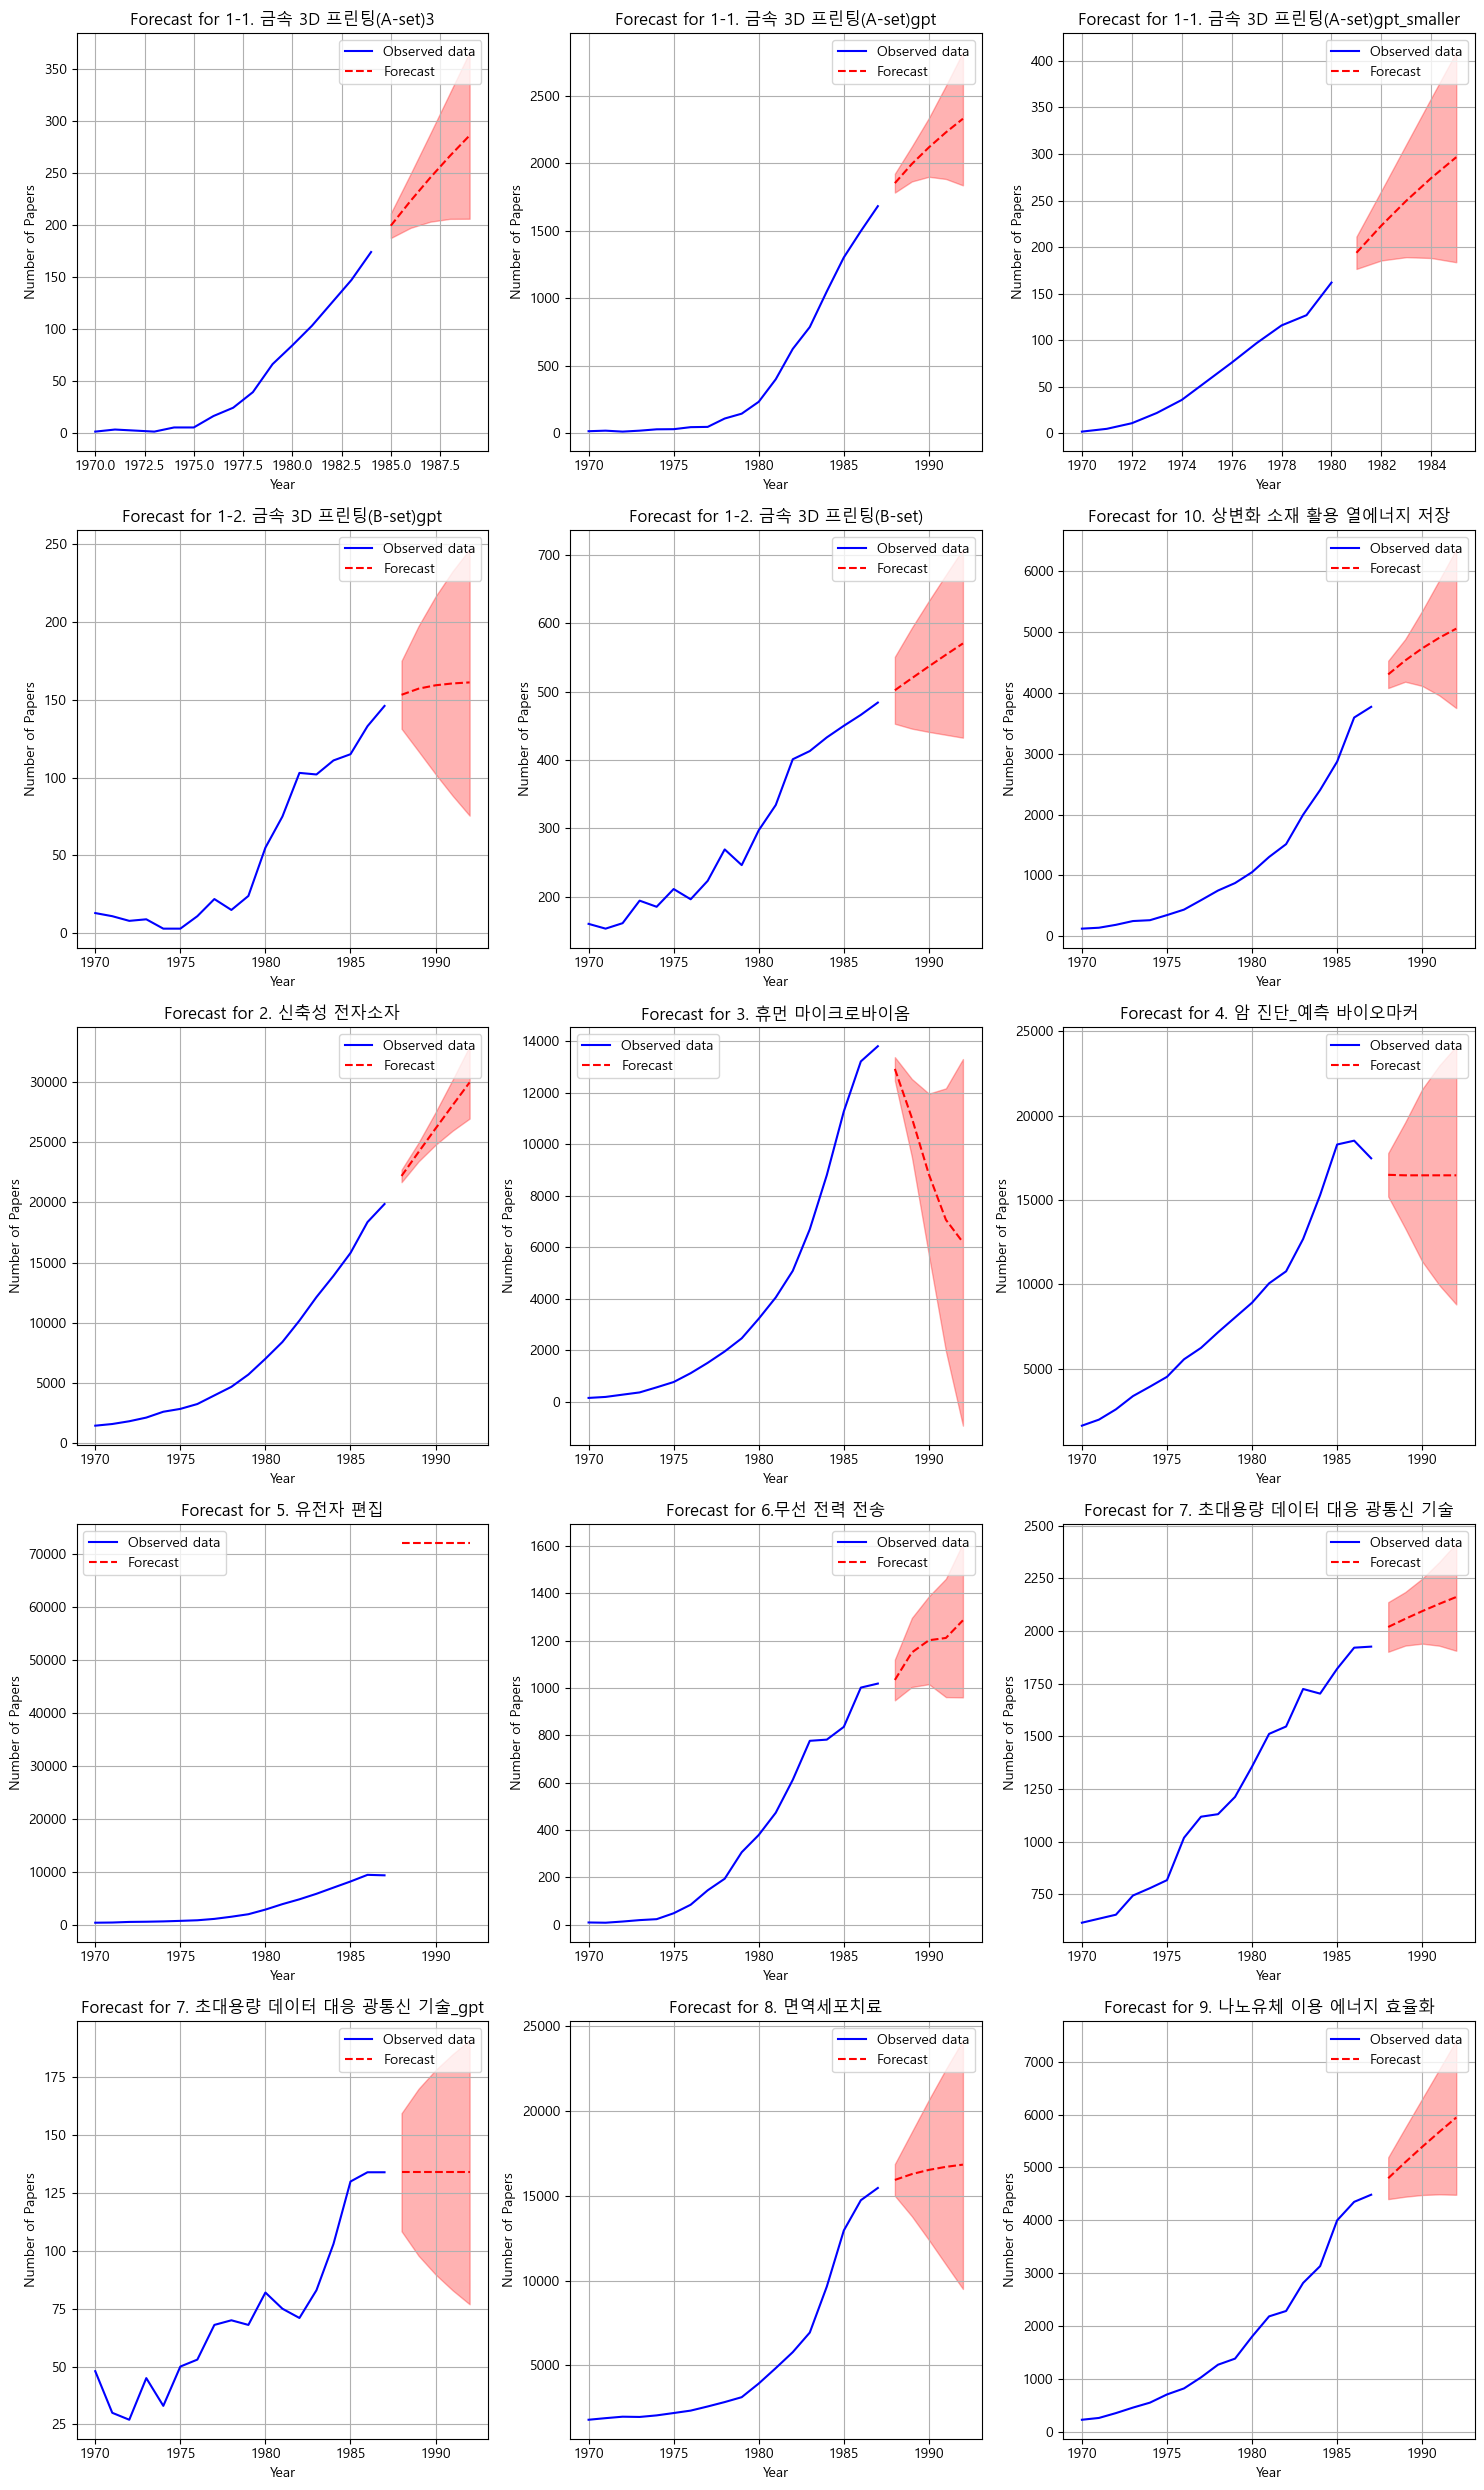

In [40]:
# 서브플롯 행과 열의 개수 설정
num_dfs = len(df_year_only_dict)
num_cols = 3
num_rows = (num_dfs + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# 각 데이터프레임에 대해 최적의 ARIMA 모델 찾기 및 예측 수행
for i, (key, df) in enumerate(df_year_only_dict.items()):
    # pubyear로 그룹화하여 uid를 집계
    df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
    df_yearly.columns = ['Year', 'Papers']

    # years와 papers 추출
    years = df_yearly['Year'].values
    papers = df_yearly['Papers'].values

    # 데이터프레임 생성
    data = pd.DataFrame({'Year': years, 'Papers': papers})
    data.set_index('Year', inplace=True)
    data.index = pd.date_range(start=data.index[0], periods=len(data), freq='AS')

    # 최적의 ARIMA 모델 찾기
    best_model, best_order, best_aic = find_best_arima_model(data['Papers'])
    
    # 최적의 모델 요약 출력
    print(f'{key} Best ARIMA order: {best_order} with AIC: {best_aic}')
    print(best_model.summary())
    
    # 미래 5년 예측
    forecast_years = 5
    forecast = best_model.get_forecast(steps=forecast_years)
    forecast_index = pd.date_range(start=data.index[-1], periods=forecast_years + 1, freq='AS')[1:]

    # 예측값과 신뢰구간 얻기
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 예측 결과를 데이터프레임으로 변환
    forecast_df = pd.DataFrame({'Year': forecast_index, 'Papers': forecast_mean})
    forecast_df.set_index('Year', inplace=True)

    # 플롯 위치 계산
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    # 예측 결과 시각화
    ax.plot(data.index.year, data['Papers'], label='Observed data', color='blue')
    ax.plot(forecast_df.index.year, forecast_df['Papers'], label='Forecast', color='red', linestyle='--')
    ax.fill_between(forecast_df.index.year, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Forecast for {key}')
    ax.legend()
    ax.grid(True)

# 남는 서브플롯 빈칸 제거
if num_dfs % num_cols != 0:
    for j in range(num_dfs, num_rows * num_cols):
        fig.delaxes(axs.flat[j])

plt.tight_layout()
plt.show()

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

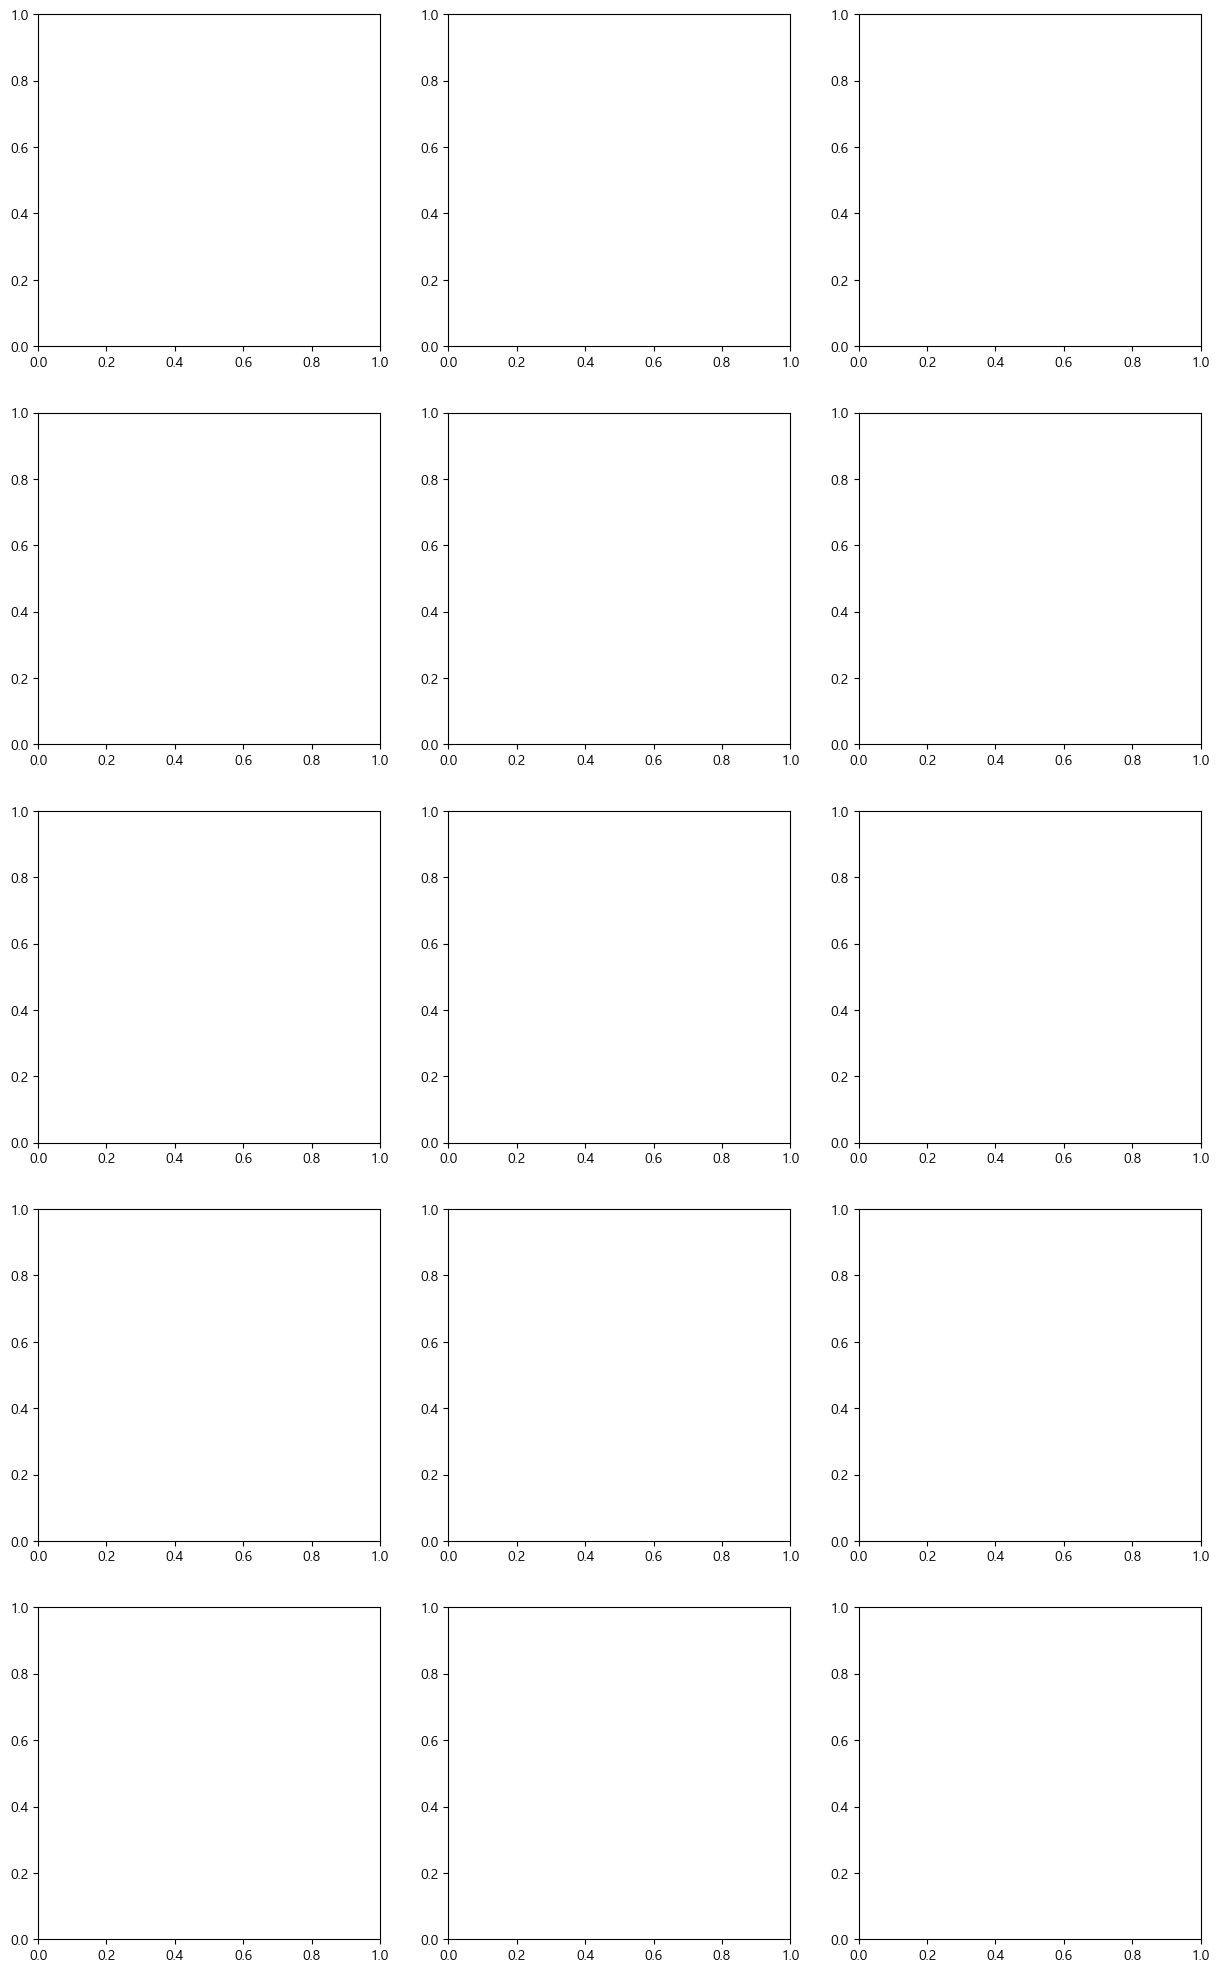

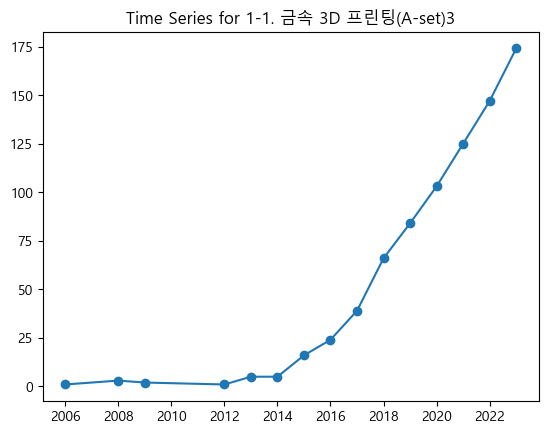

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


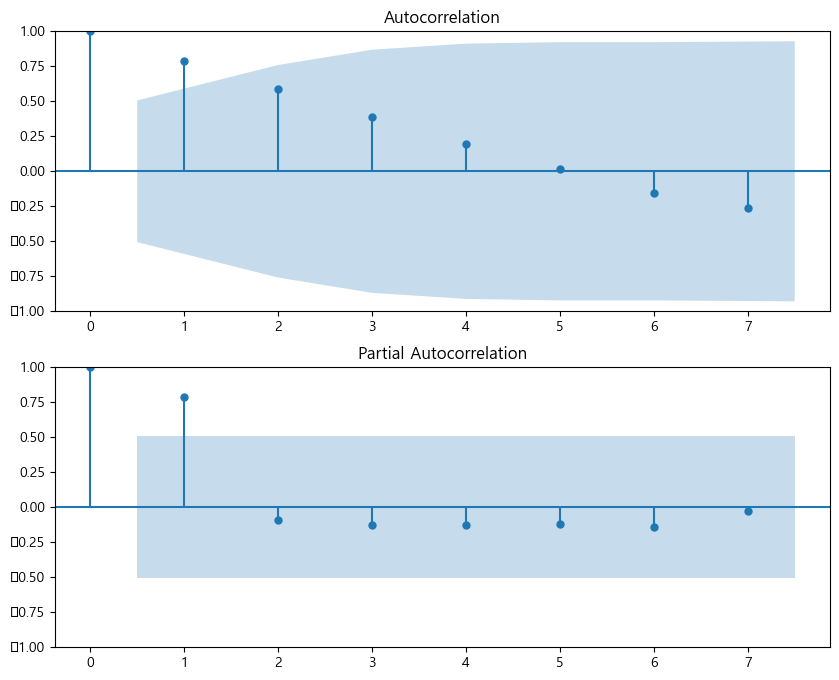

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\

ARIMA model summary for 1-1. 금속 3D 프린팅(A-set)3:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   15
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -43.779
Date:                Wed, 05 Jun 2024   AIC                            101.558
Time:                        23:10:19   BIC                            106.032
Sample:                             0   HQIC                           101.144
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4107      1.326     -0.310      0.757      -3.010       2.189
ar.L2          0.4992      0.368      1.355      0.175      -0.223       1.221
ar.L

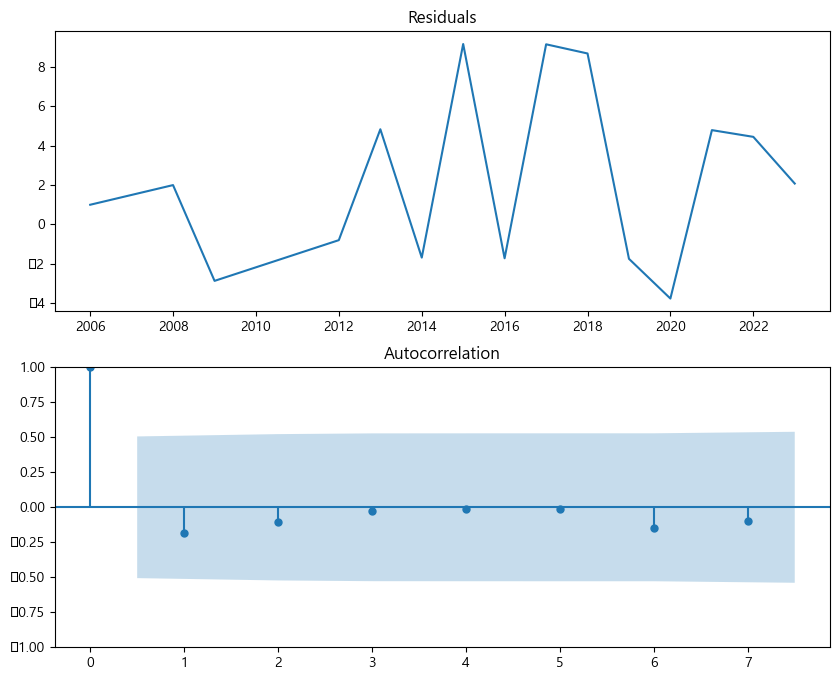

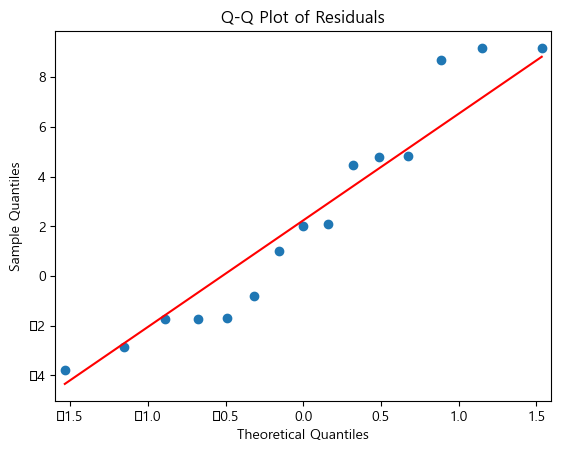

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


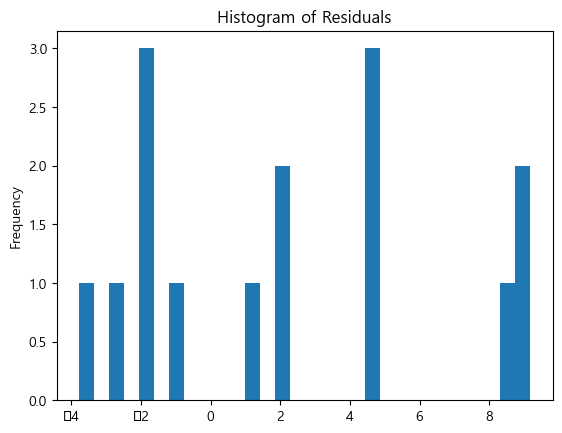

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


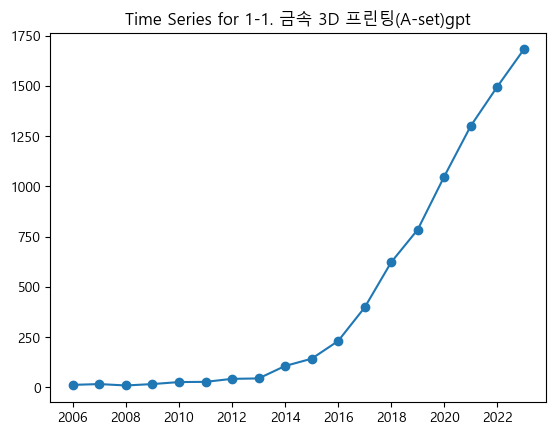

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


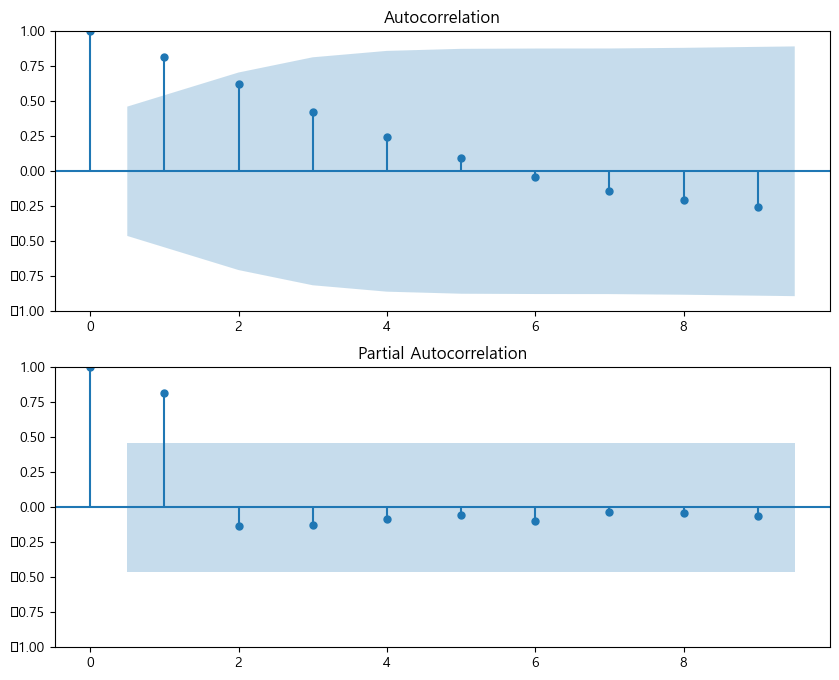

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

ARIMA model summary for 1-1. 금속 3D 프린팅(A-set)gpt:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -87.392
Date:                Wed, 05 Jun 2024   AIC                            188.784
Time:                        23:10:21   BIC                            194.617
Sample:                    01-01-2006   HQIC                           189.364
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.4079     42.448      0.057      0.955     -80.789      85.605
ar.L2         -1.9441     65.842     -0.030      0.976    -130.992     127.103
ar

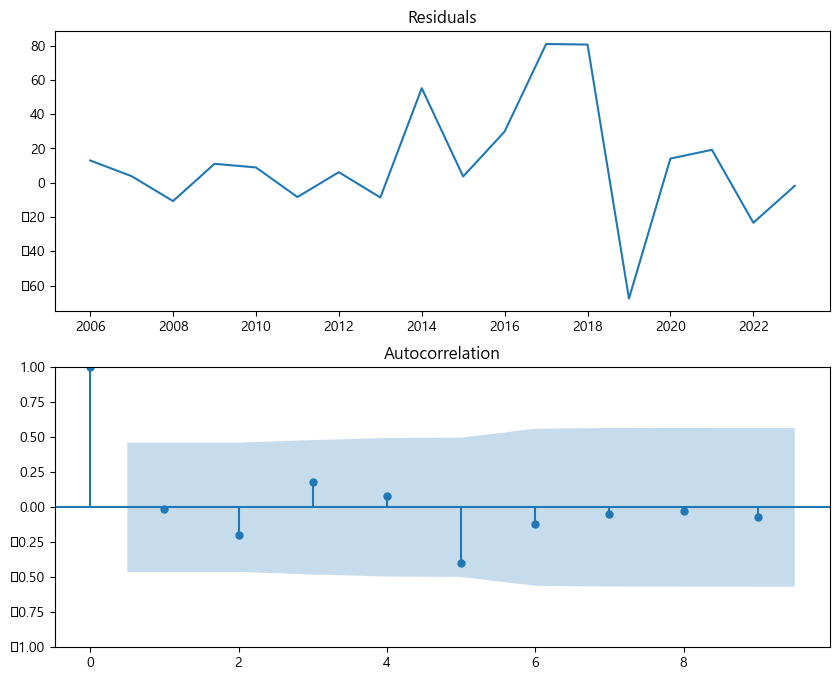

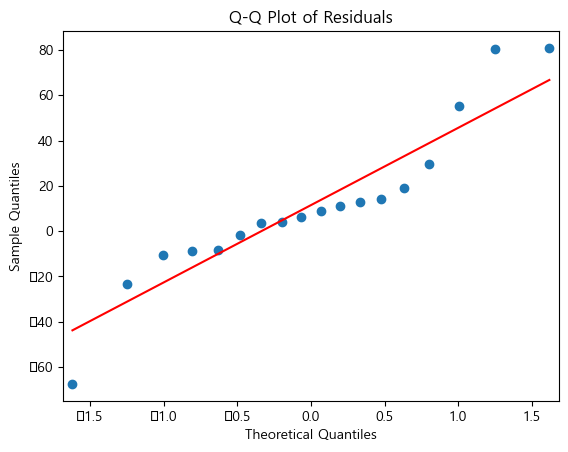

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


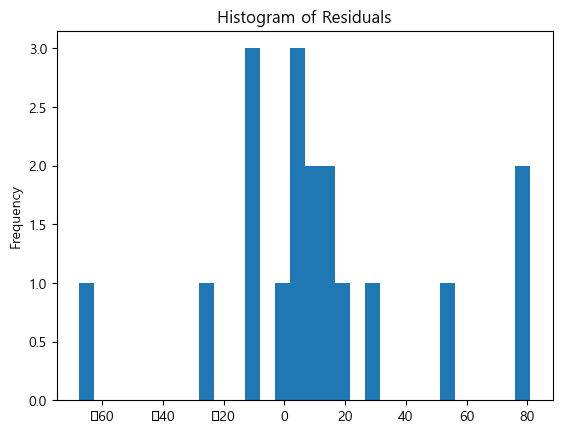

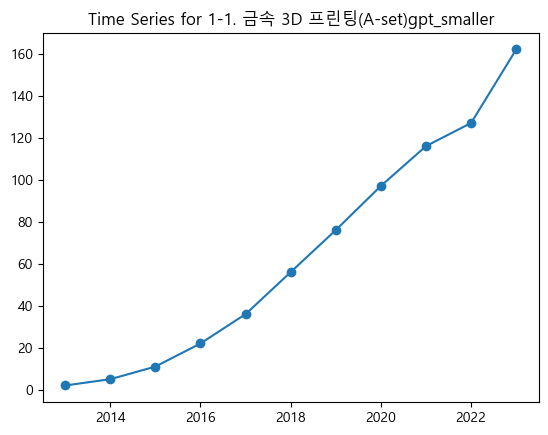

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


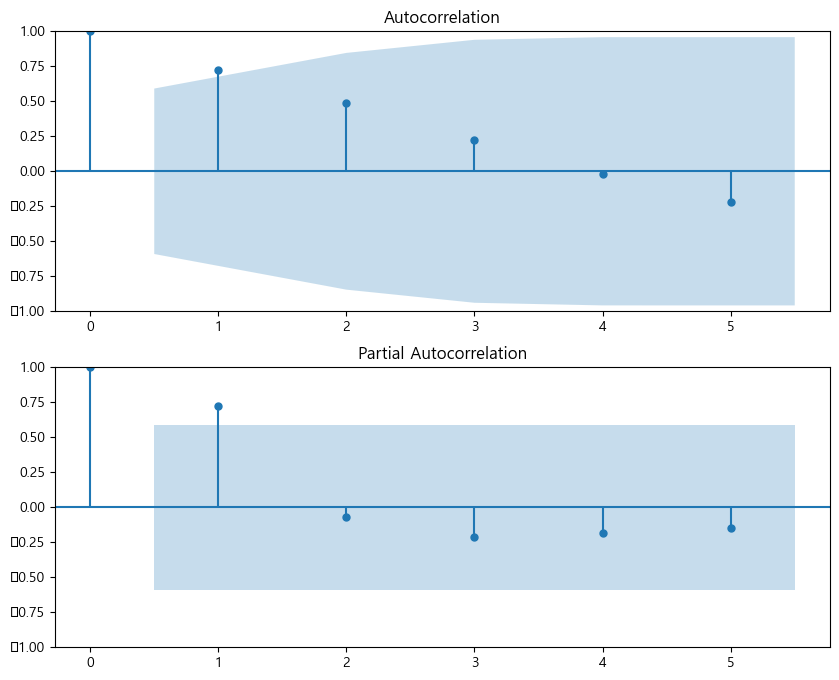

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

ARIMA model summary for 1-1. 금속 3D 프린팅(A-set)gpt_smaller:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   11
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -36.145
Date:                Wed, 05 Jun 2024   AIC                             86.289
Time:                        23:10:23   BIC                             88.408
Sample:                    01-01-2013   HQIC                            83.966
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3339     41.614     -0.008      0.994     -81.897      81.229
ar.L2          0.6490     29.761      0.022      0.983     -57.681      5

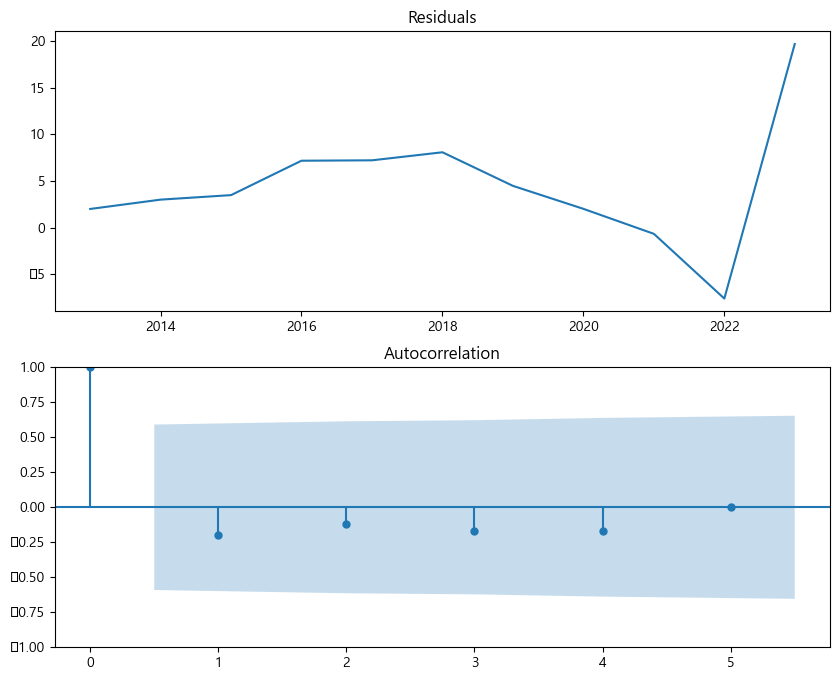

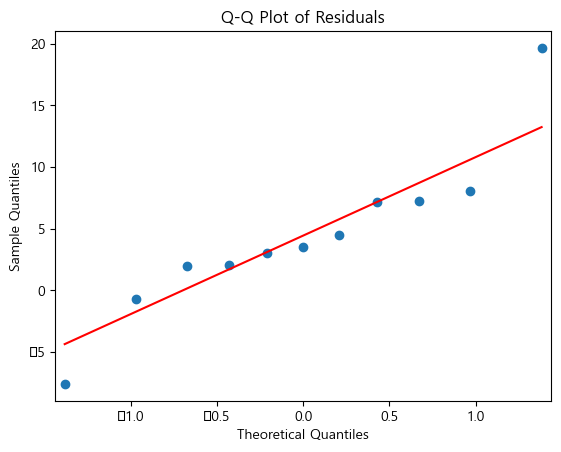

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


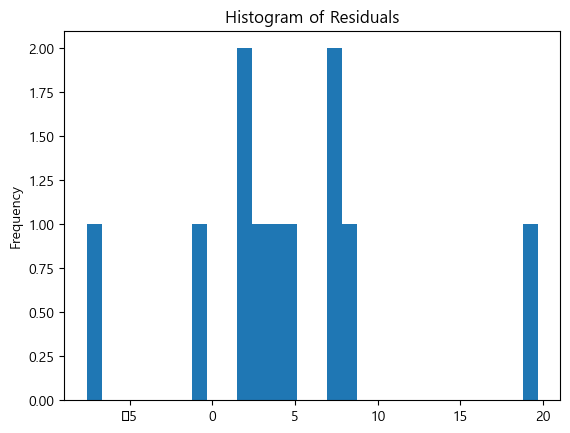

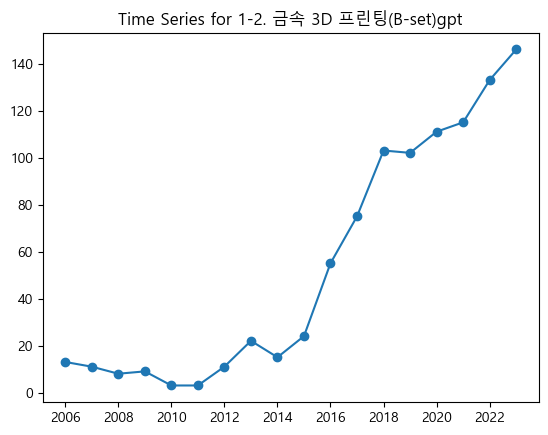

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


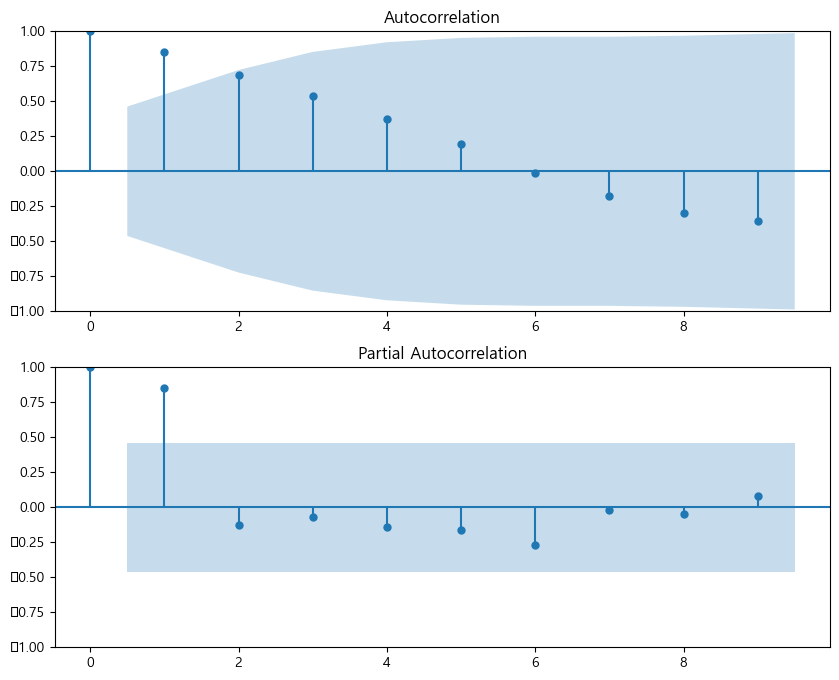

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA model summary for 1-2. 금속 3D 프린팅(B-set)gpt:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -64.200
Date:                Wed, 05 Jun 2024   AIC                            142.401
Time:                        23:10:24   BIC                            148.233
Sample:                    01-01-2006   HQIC                           142.981
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2275      5.377      0.042      0.966     -10.311      10.766
ar.L2          0.3138      1.937      0.162      0.871      -3.482       4.110
ar

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


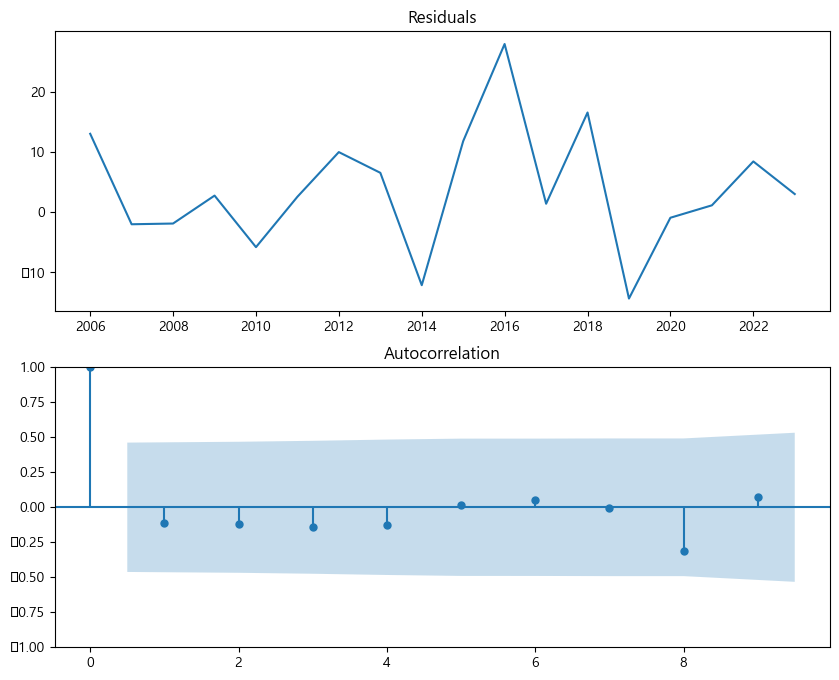

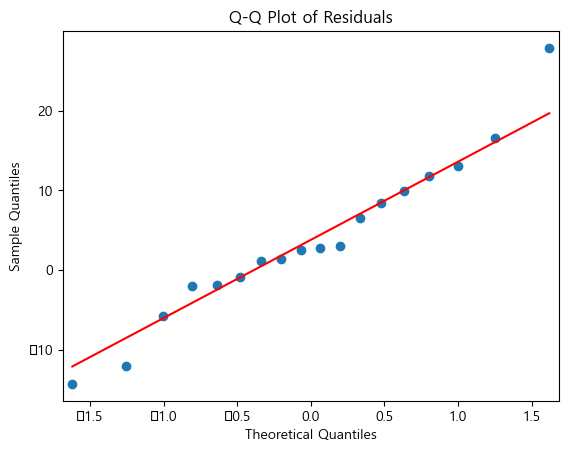

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


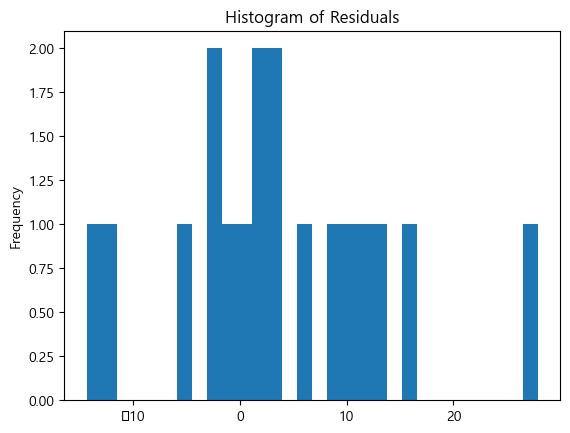

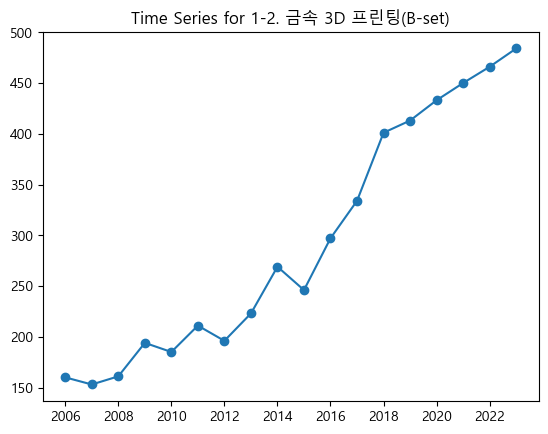

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


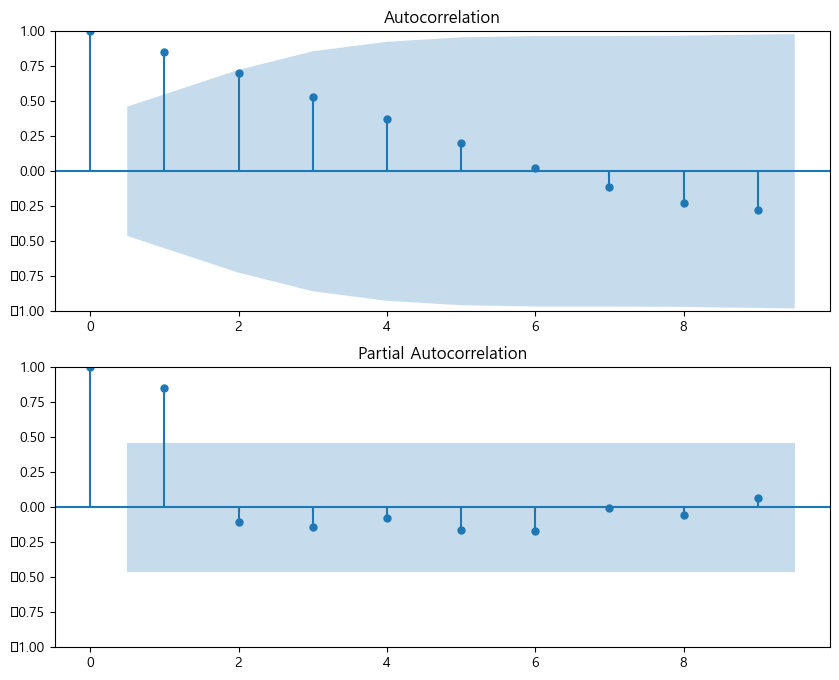

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max

ARIMA model summary for 1-2. 금속 3D 프린팅(B-set):
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -78.058
Date:                Wed, 05 Jun 2024   AIC                            170.115
Time:                        23:10:26   BIC                            175.948
Sample:                    01-01-2006   HQIC                           170.695
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4667      0.952     -0.490      0.624      -2.332       1.399
ar.L2          0.5234      0.747      0.701      0.483      -0.940       1.987
ar.L3

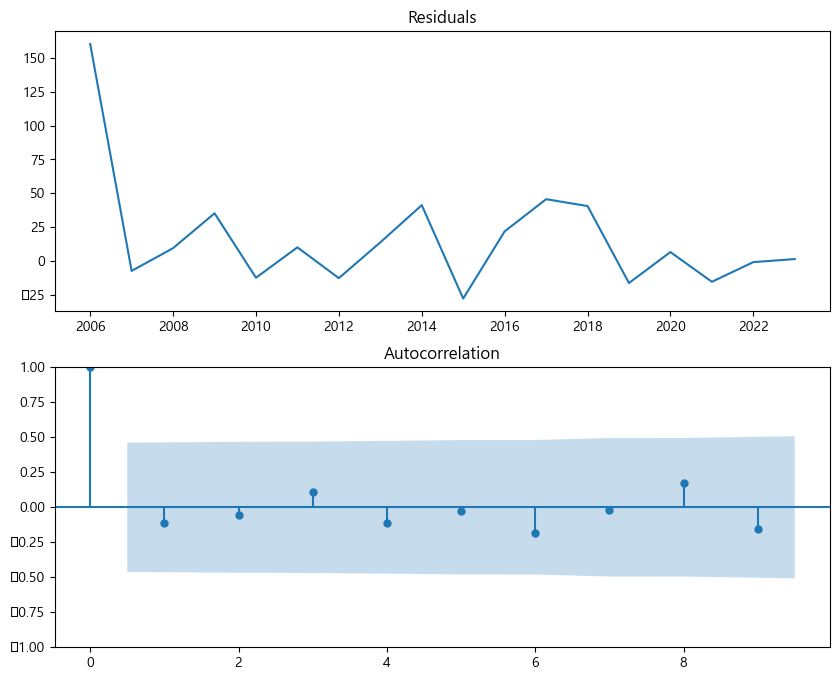

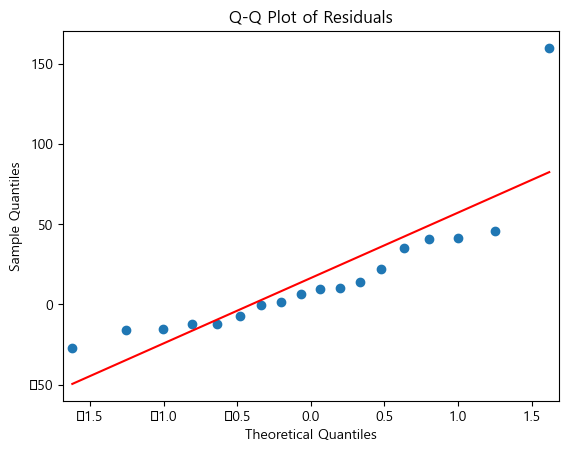

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


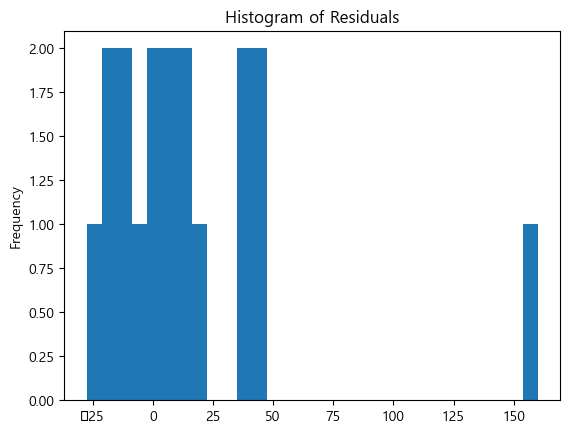

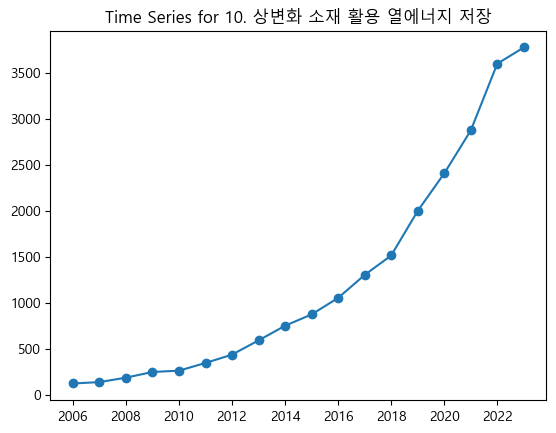

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


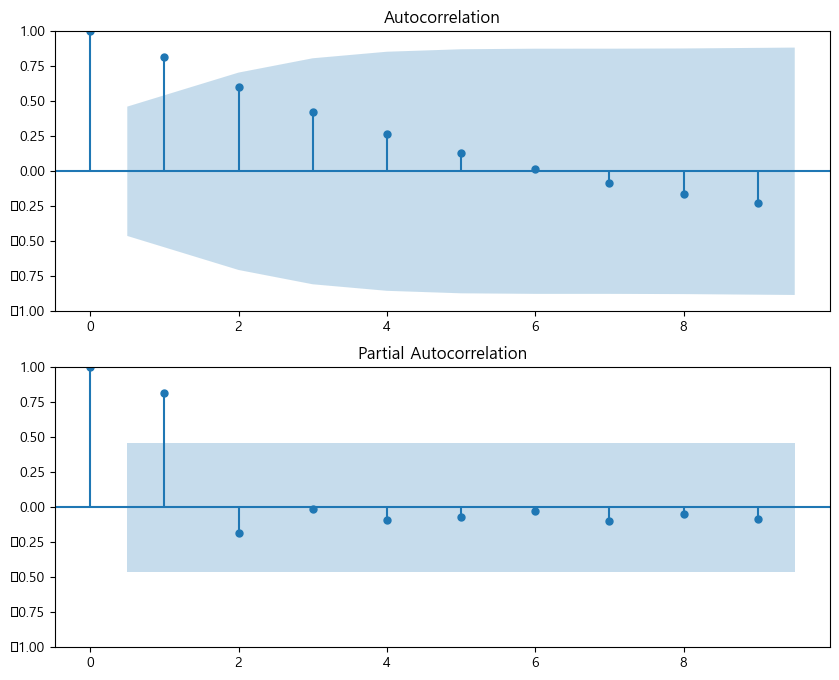

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max

ARIMA model summary for 10. 상변화 소재 활용 열에너지 저장:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -104.973
Date:                Wed, 05 Jun 2024   AIC                            223.946
Time:                        23:10:28   BIC                            229.778
Sample:                    01-01-2006   HQIC                           224.526
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5616      0.239     -2.347      0.019      -1.031      -0.093
ar.L2          0.4528      0.352      1.286      0.198      -0.237       1.143
ar.L3

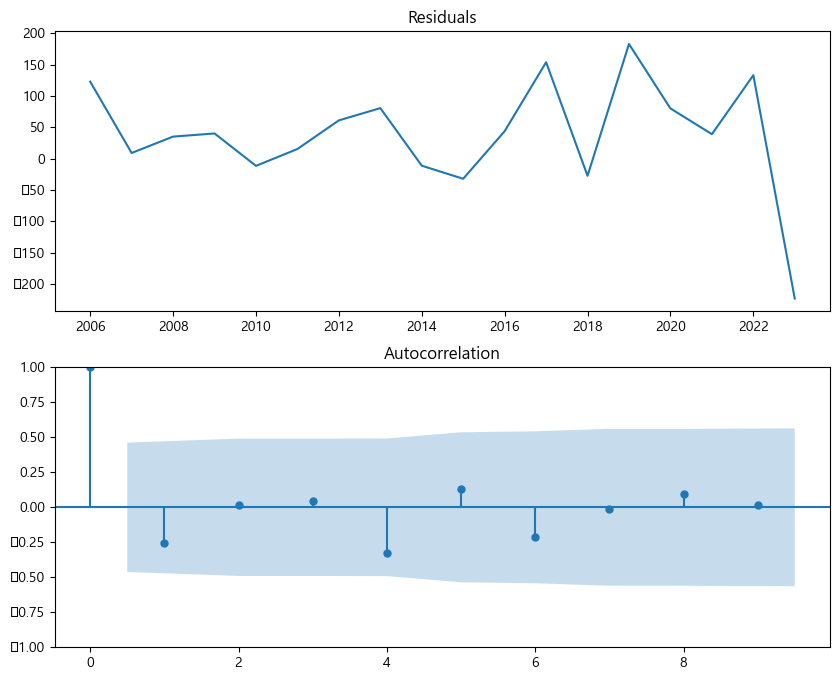

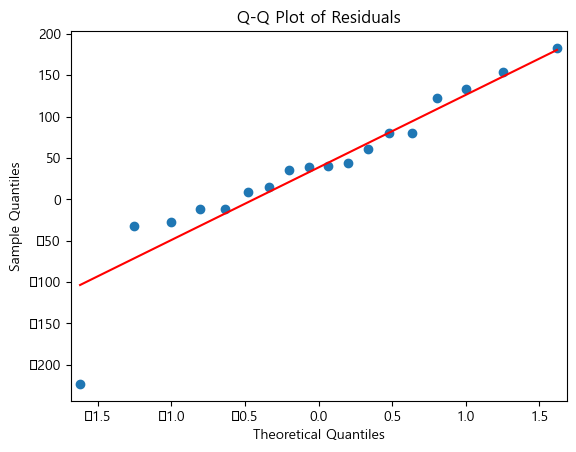

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


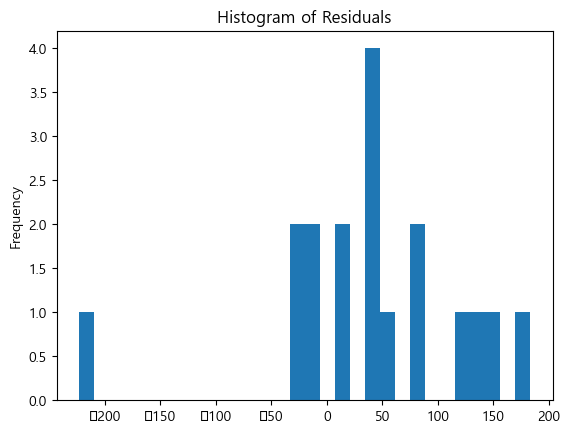

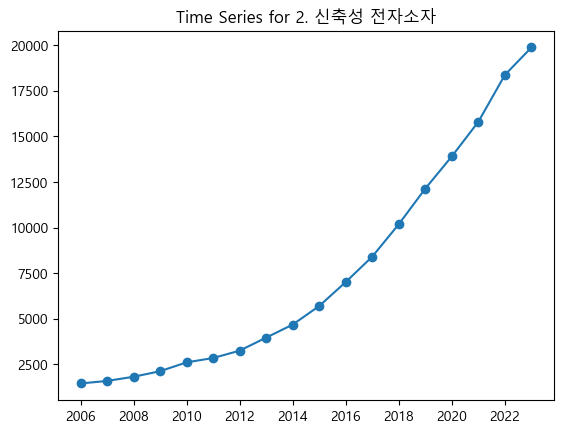

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


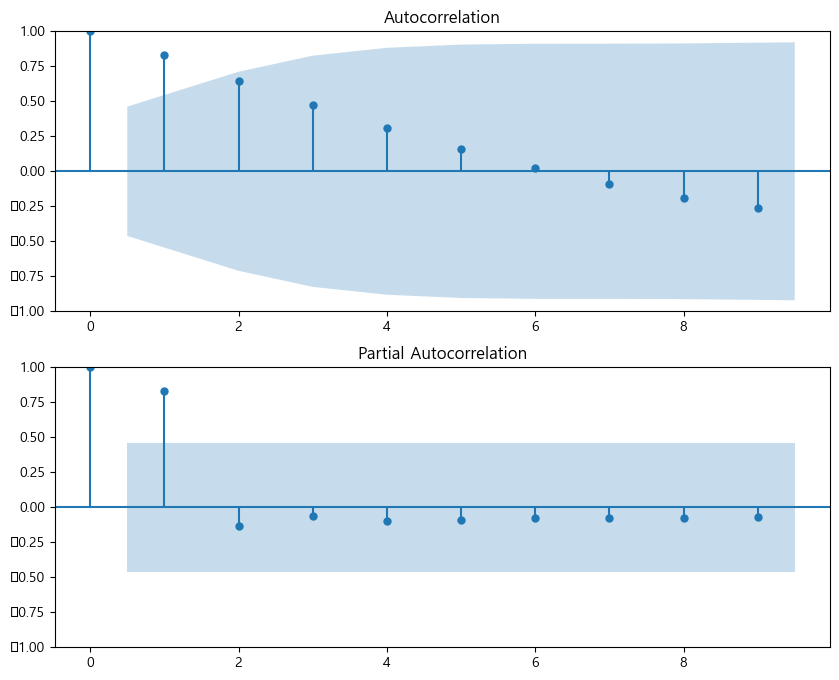

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 2. 신축성 전자소자:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -121.597
Date:                Wed, 05 Jun 2024   AIC                            257.195
Time:                        23:10:30   BIC                            263.027
Sample:                    01-01-2006   HQIC                           257.774
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3971      1.377      0.288      0.773      -2.301       3.095
ar.L2          0.3386      1.449      0.234      0.815      -2.501       3.178
ar.L3          

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


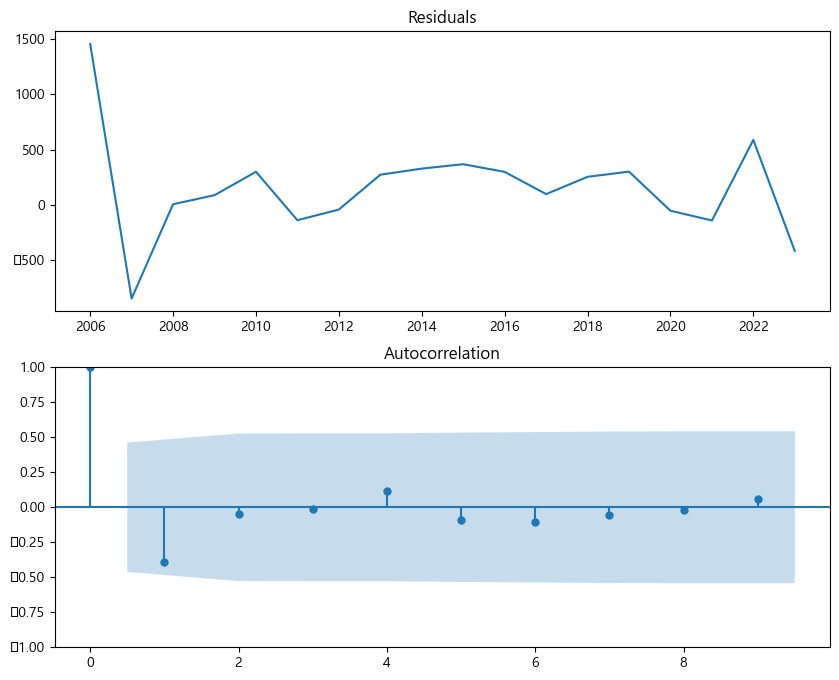

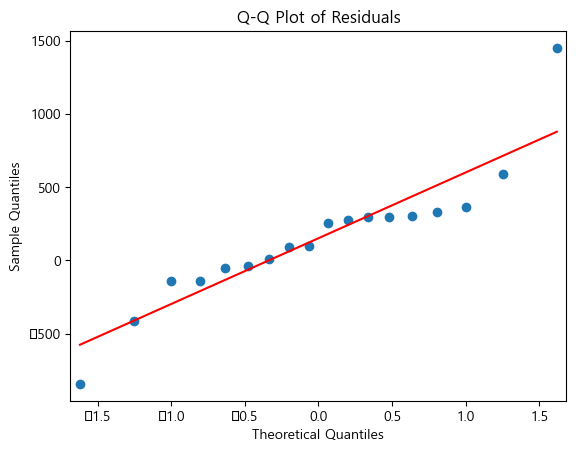

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


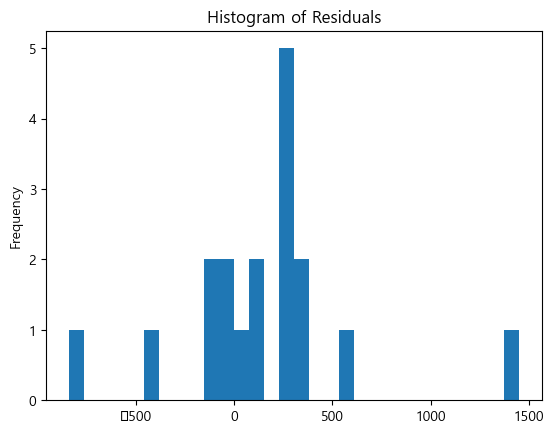

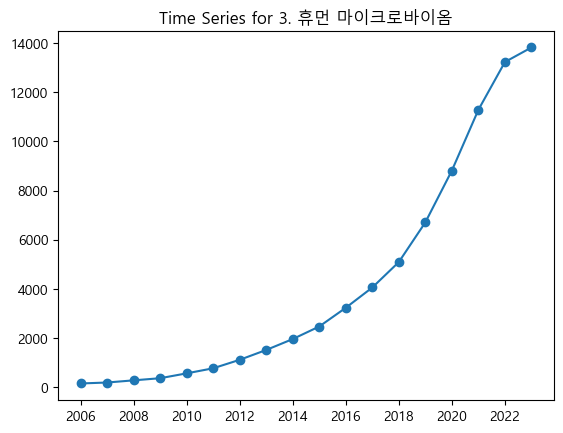

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


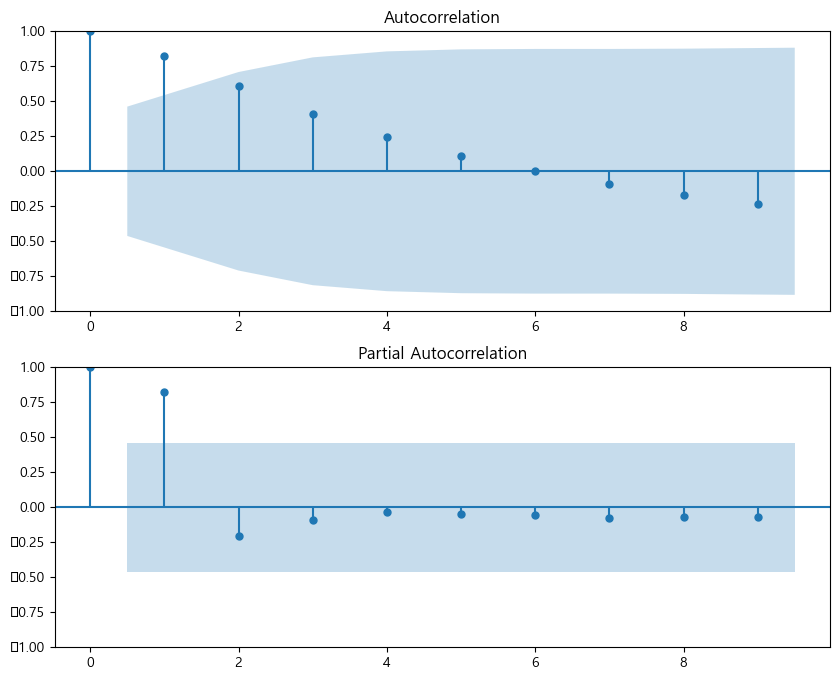

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 3. 휴먼 마이크로바이옴:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -117.124
Date:                Wed, 05 Jun 2024   AIC                            248.248
Time:                        23:10:32   BIC                            254.080
Sample:                    01-01-2006   HQIC                           248.827
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0429      0.739      1.412      0.158      -0.405       2.491
ar.L2         -0.1901      1.713     -0.111      0.912      -3.547       3.167
ar.L3        

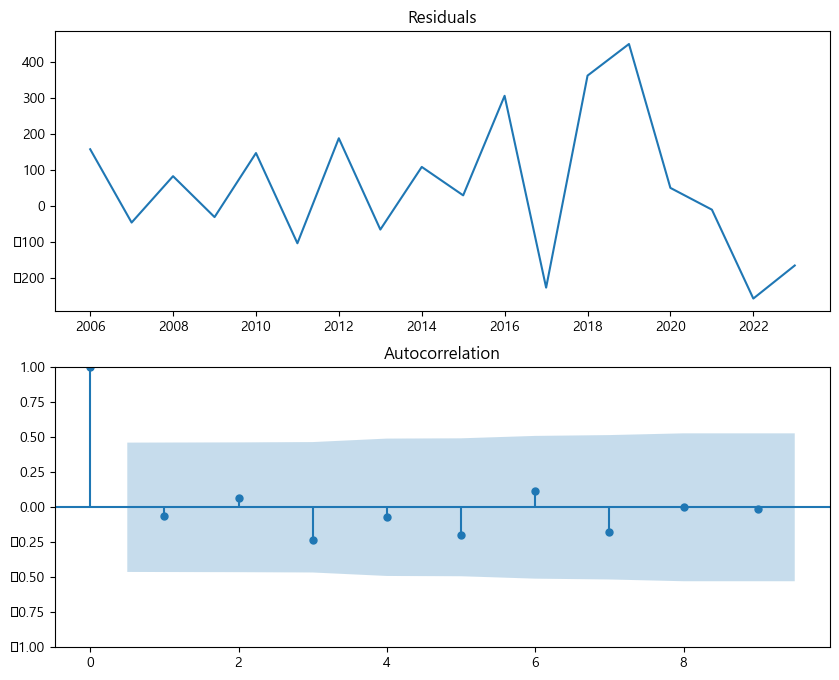

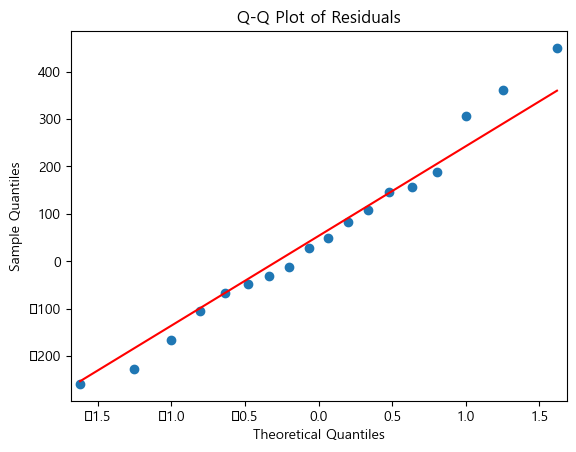

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


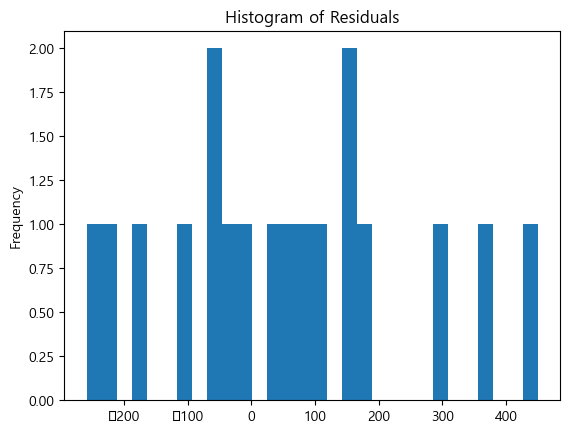

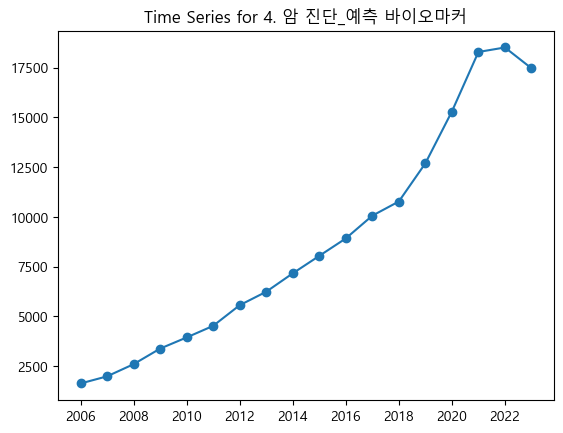

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


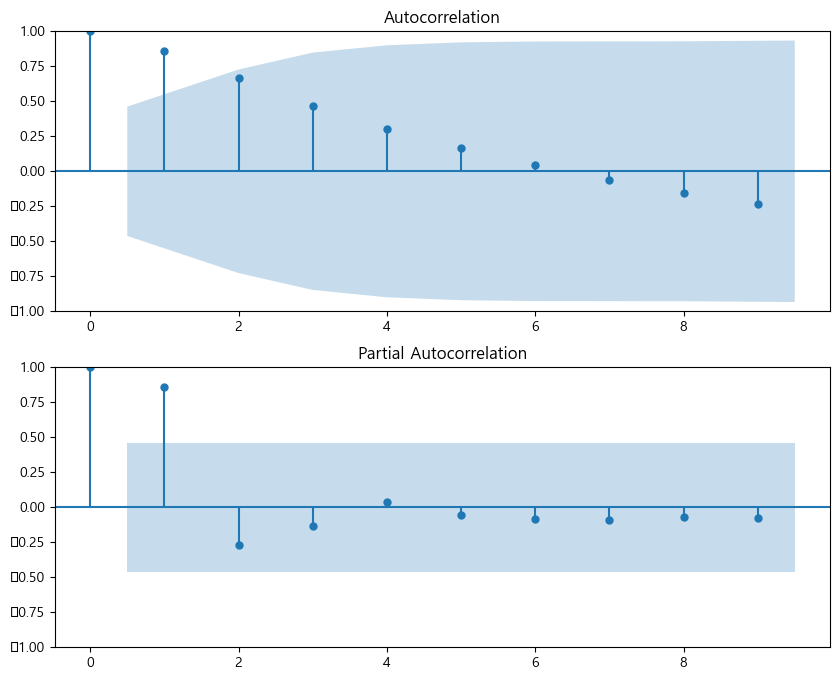

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

ARIMA model summary for 4. 암 진단_예측 바이오마커:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -134.906
Date:                Wed, 05 Jun 2024   AIC                            283.813
Time:                        23:10:34   BIC                            289.645
Sample:                    01-01-2006   HQIC                           284.393
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4942      0.258      5.802      0.000       0.989       1.999
ar.L2         -1.2509      0.430     -2.912      0.004      -2.093      -0.409
ar.L3     

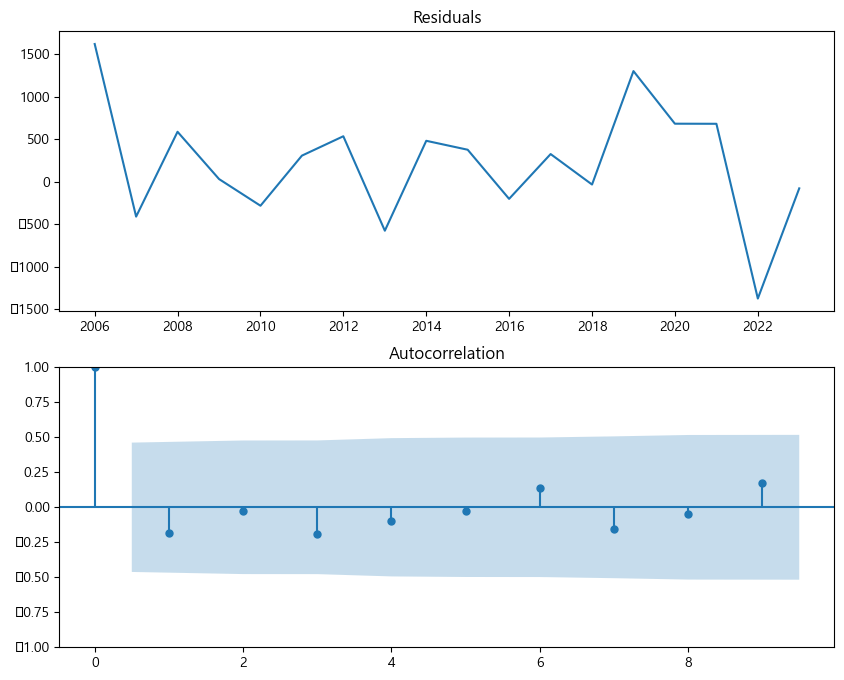

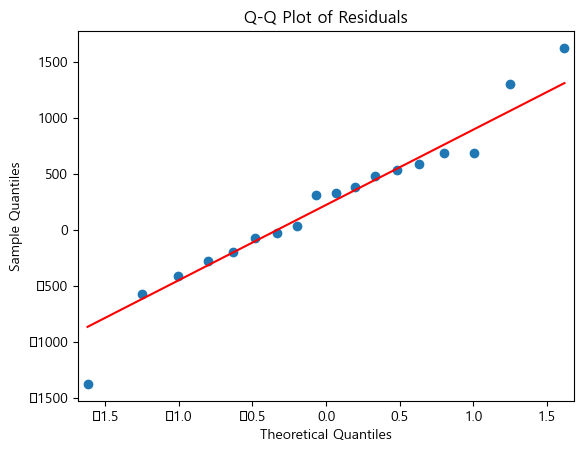

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


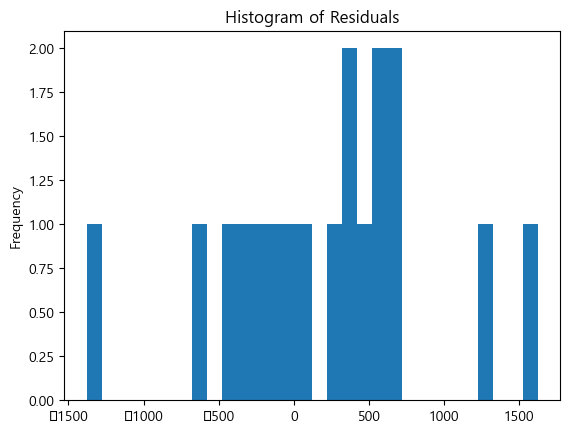

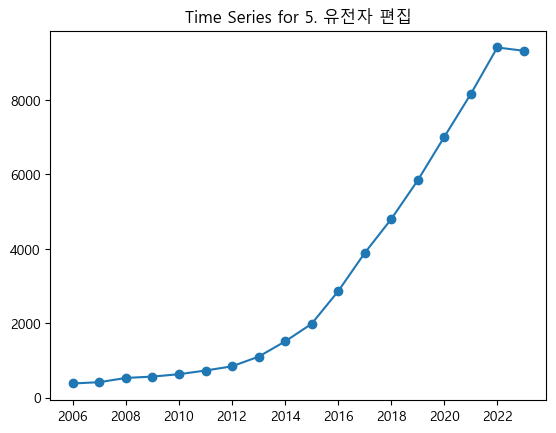

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


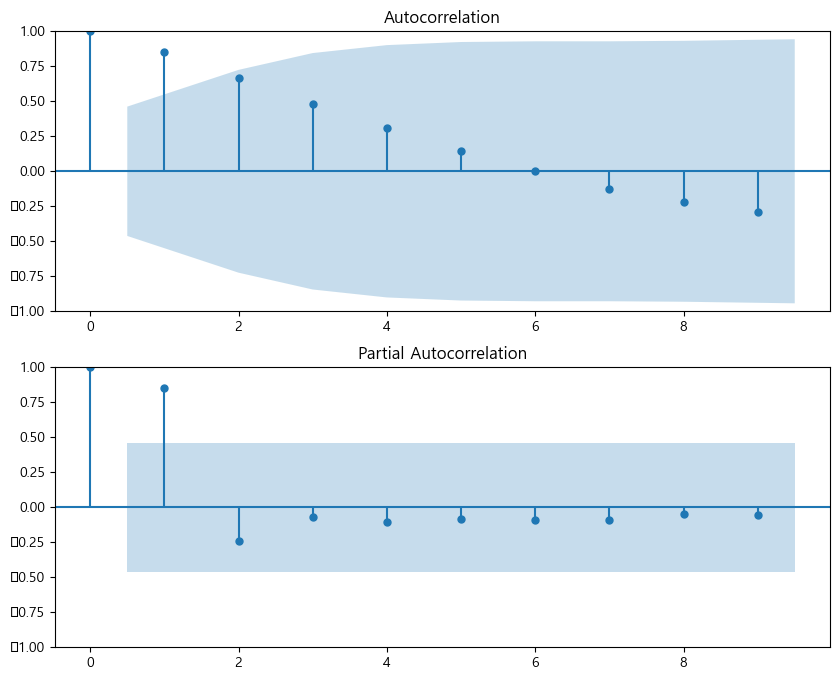

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 5. 유전자 편집:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -122.185
Date:                Wed, 05 Jun 2024   AIC                            258.370
Time:                        23:10:35   BIC                            264.202
Sample:                    01-01-2006   HQIC                           258.950
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2448      5.693     -0.043      0.966     -11.402      10.913
ar.L2          0.3224      1.980      0.163      0.871      -3.559       4.204
ar.L3          0.

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


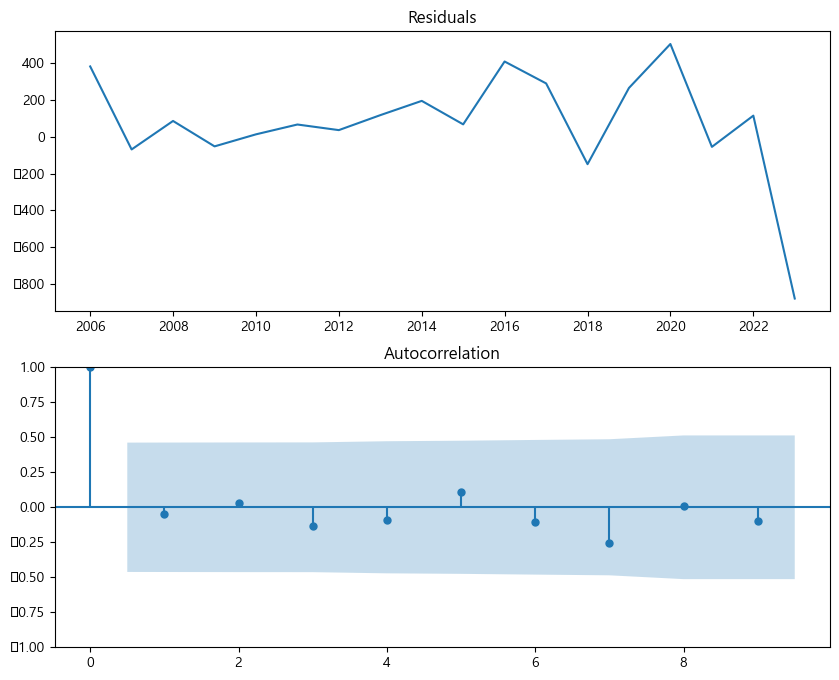

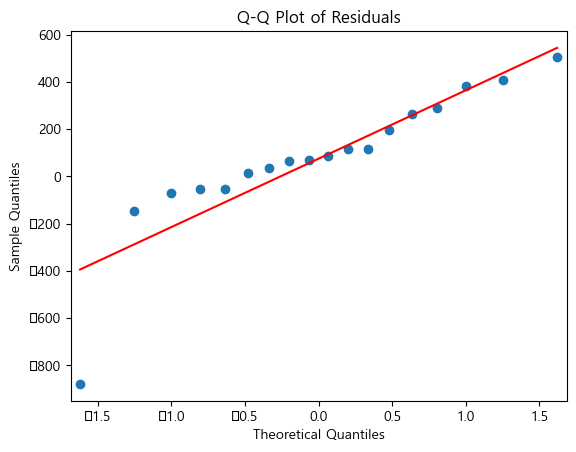

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


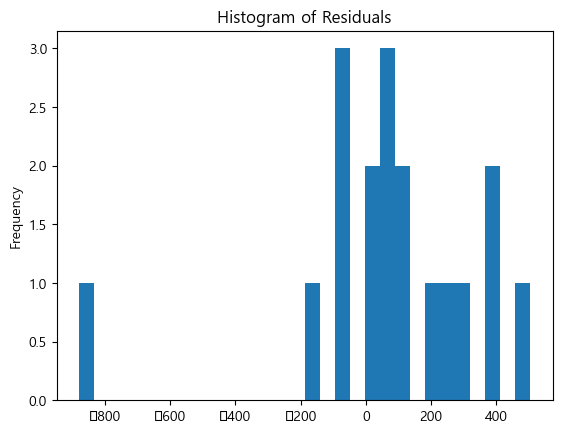

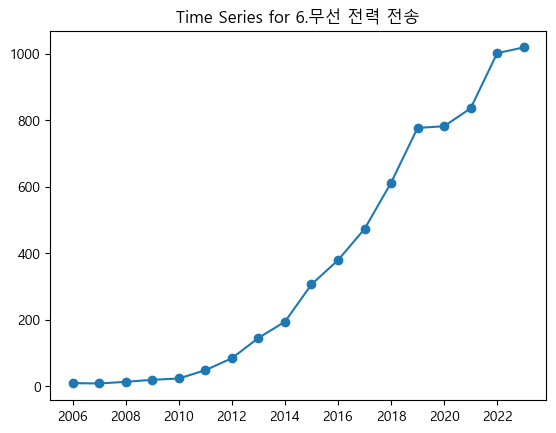

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


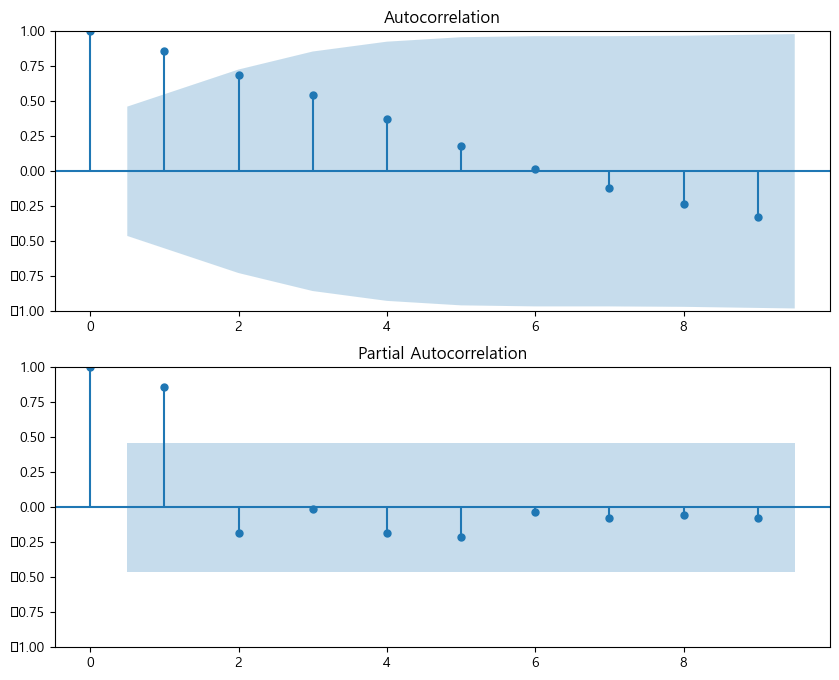

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 6.무선 전력 전송:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -88.285
Date:                Wed, 05 Jun 2024   AIC                            190.570
Time:                        23:10:37   BIC                            196.403
Sample:                    01-01-2006   HQIC                           191.150
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7698      1.347      0.571      0.568      -1.871       3.410
ar.L2         -0.4869      2.118     -0.230      0.818      -4.638       3.664
ar.L3          0

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


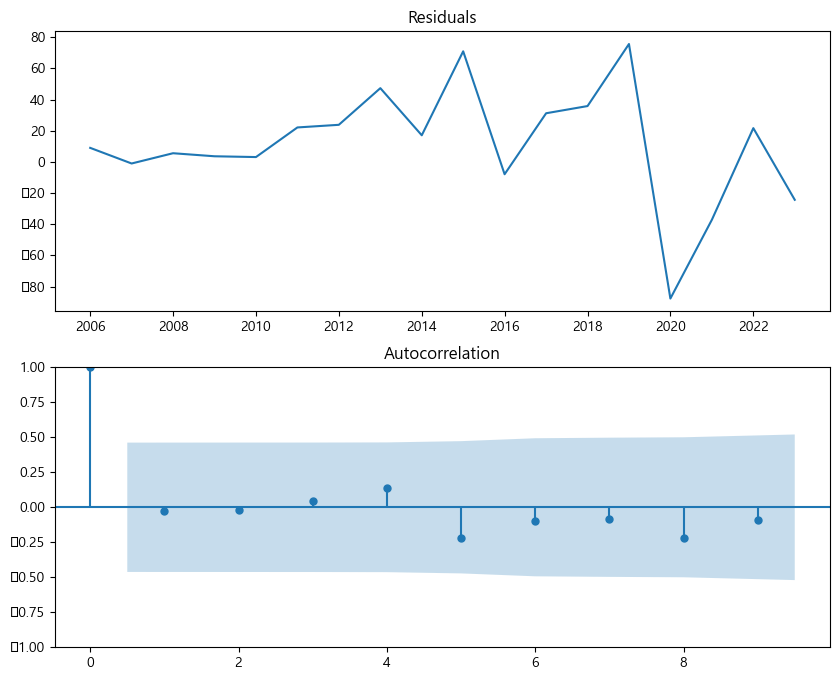

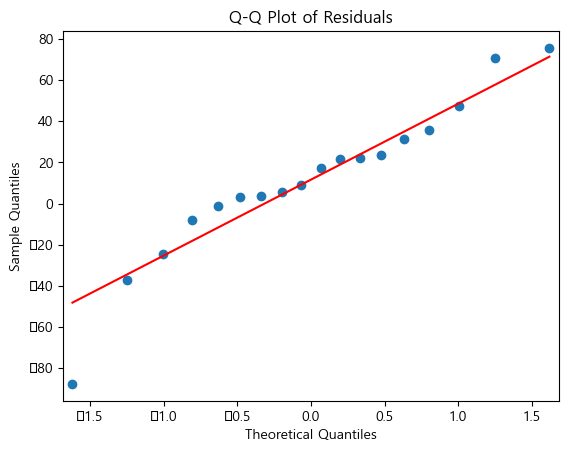

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


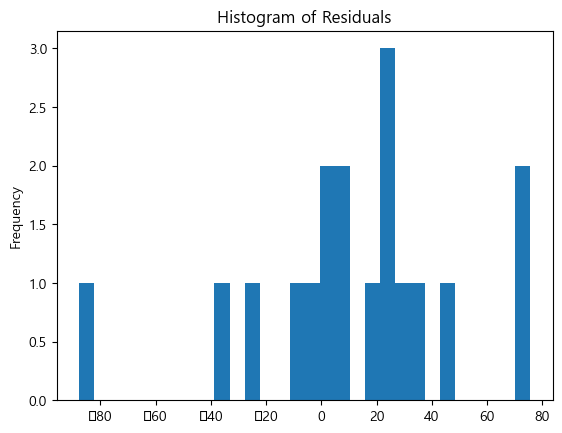

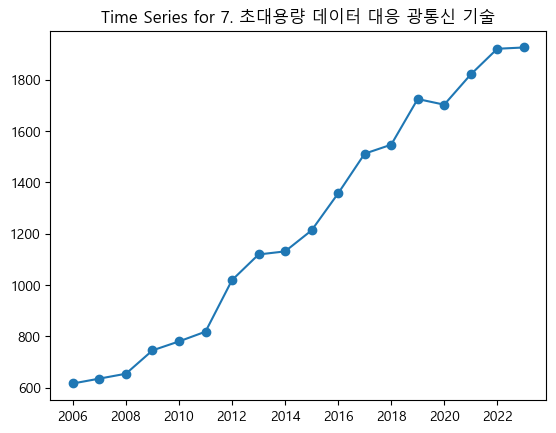

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


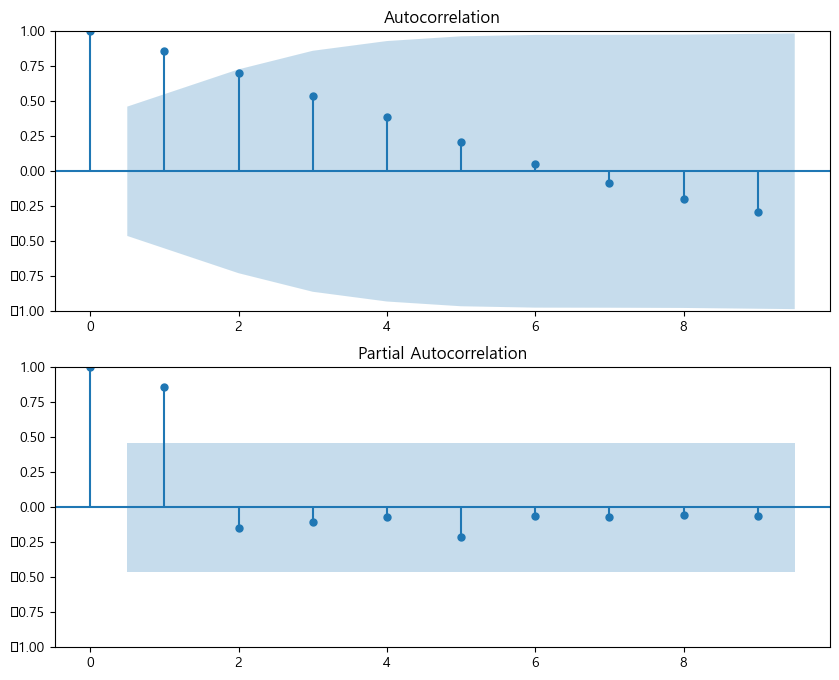

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 7. 초대용량 데이터 대응 광통신 기술:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -94.627
Date:                Wed, 05 Jun 2024   AIC                            203.253
Time:                        23:10:39   BIC                            209.086
Sample:                    01-01-2006   HQIC                           203.833
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3298      1.562      0.211      0.833      -2.731       3.391
ar.L2          0.7562      2.186      0.346      0.729      -3.529       5.041
ar.L3

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


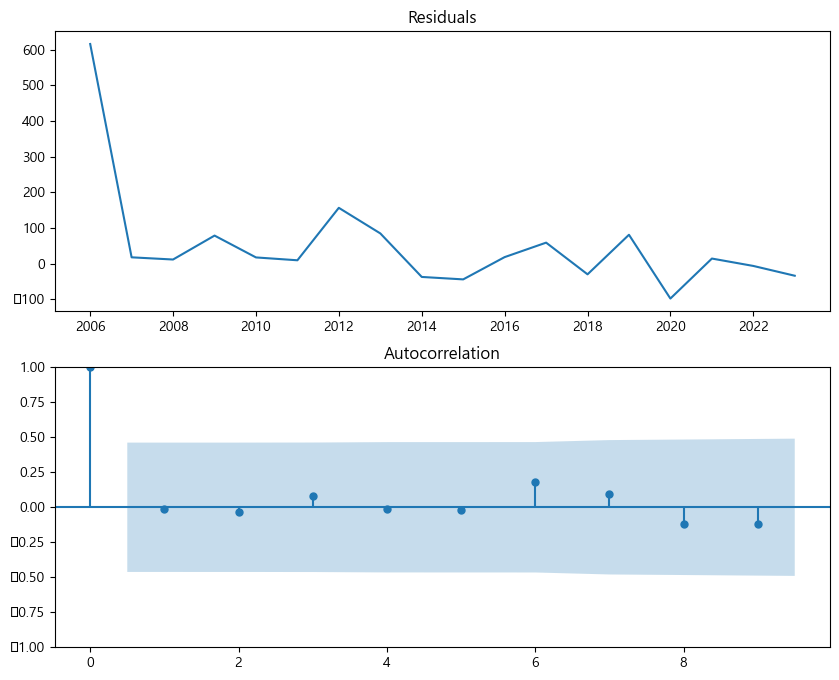

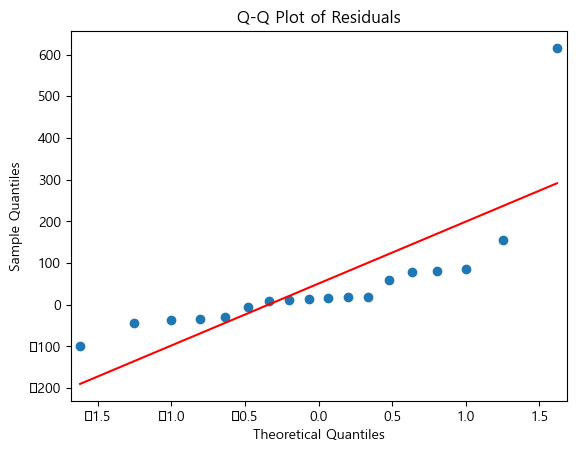

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


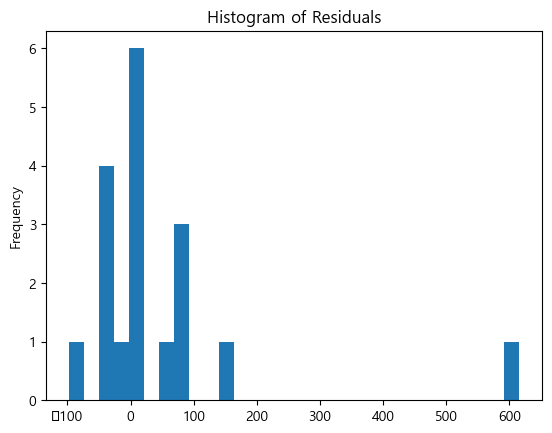

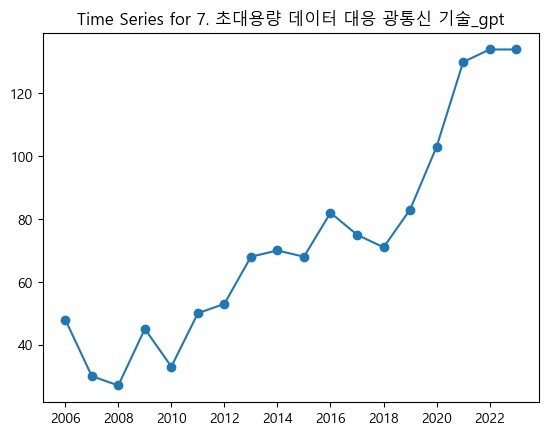

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


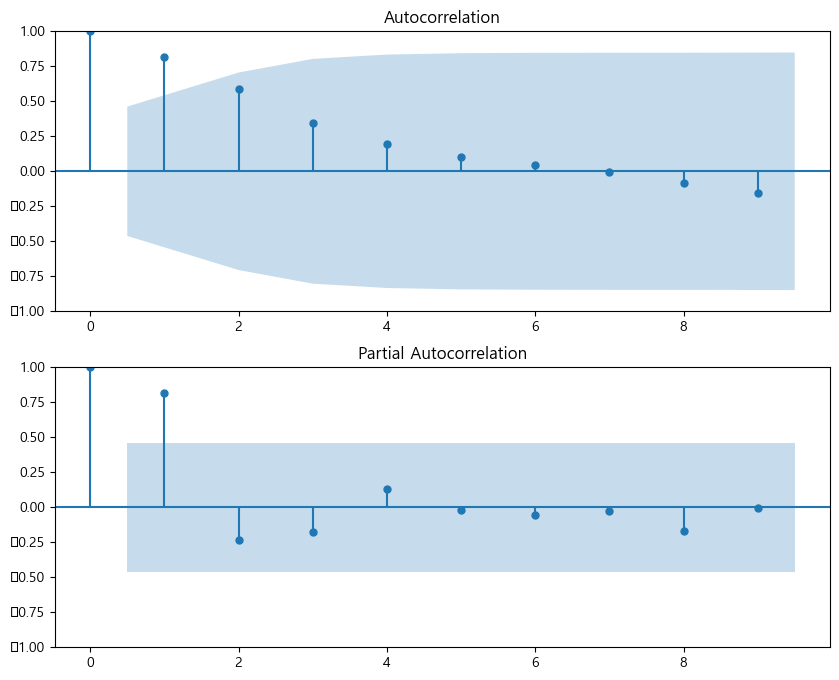

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ARIMA model summary for 7. 초대용량 데이터 대응 광통신 기술_gpt:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -66.352
Date:                Wed, 05 Jun 2024   AIC                            146.704
Time:                        23:10:40   BIC                            152.536
Sample:                    01-01-2006   HQIC                           147.284
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6273      0.345     -1.820      0.069      -1.303       0.048
ar.L2          0.6063      0.634      0.956      0.339      -0.637       1.849
a

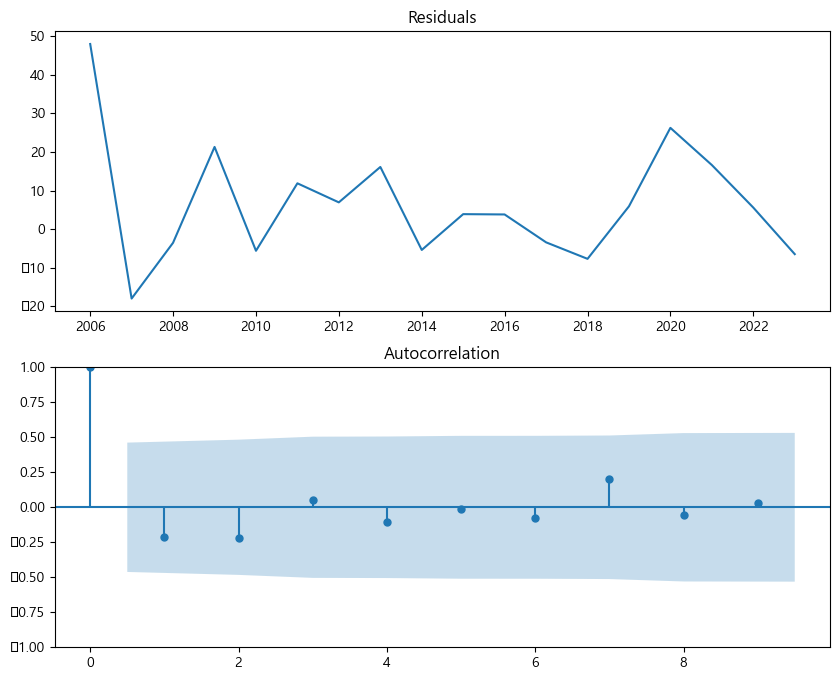

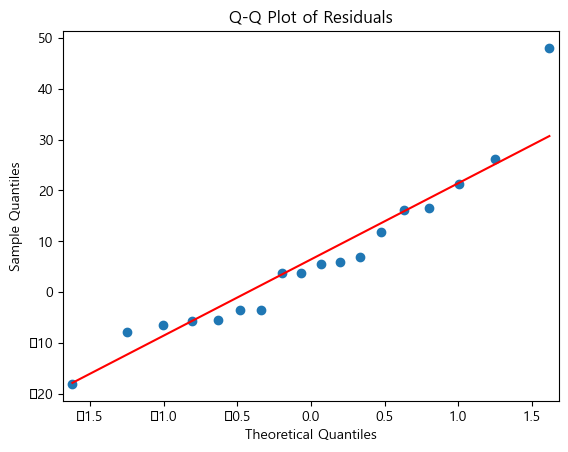

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


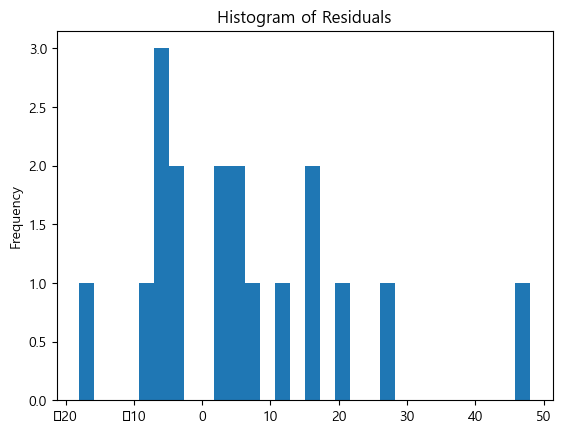

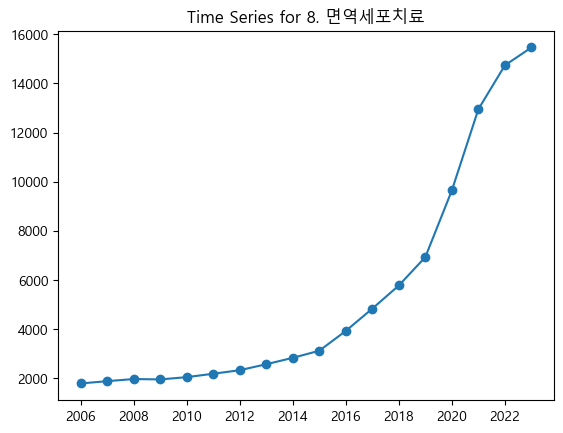

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


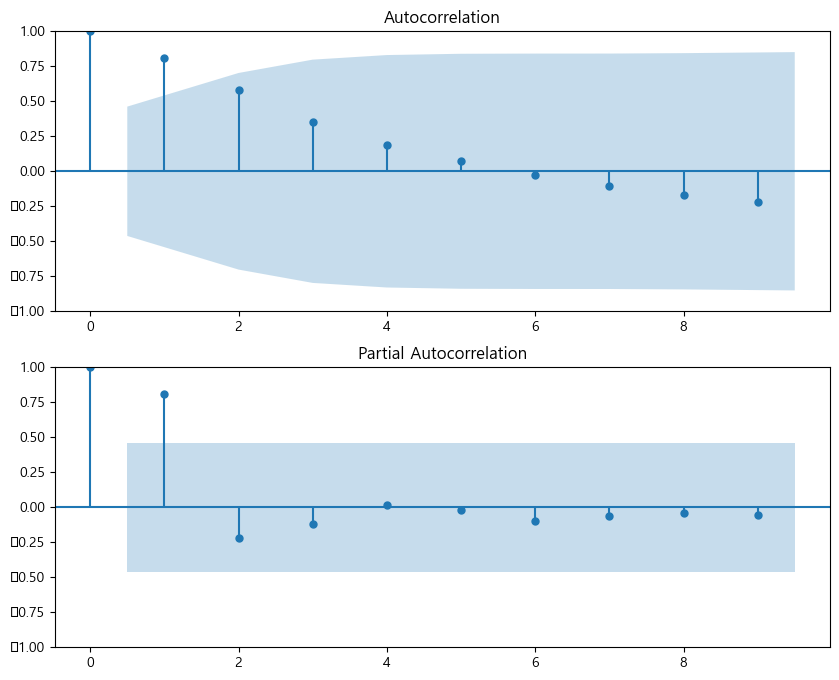

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 8. 면역세포치료:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -128.895
Date:                Wed, 05 Jun 2024   AIC                            271.789
Time:                        23:10:42   BIC                            277.622
Sample:                    01-01-2006   HQIC                           272.369
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8716      0.852      1.023      0.306      -0.798       2.541
ar.L2         -0.7593      0.523     -1.453      0.146      -1.784       0.265
ar.L3          0.

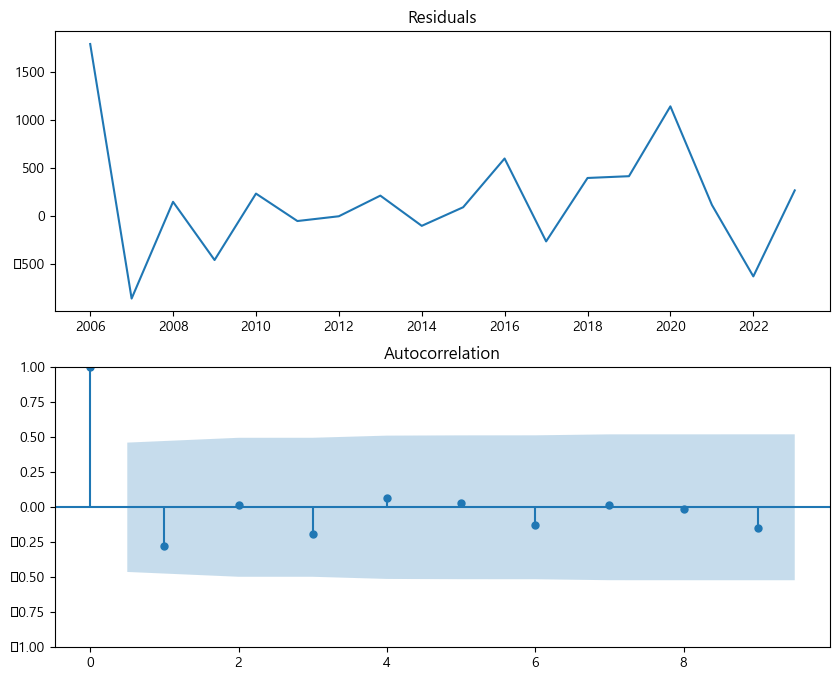

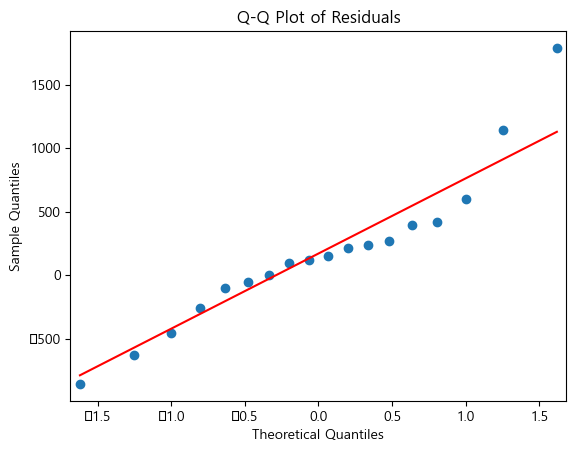

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


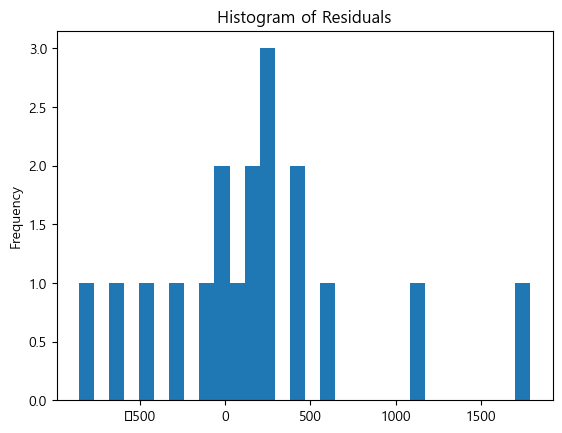

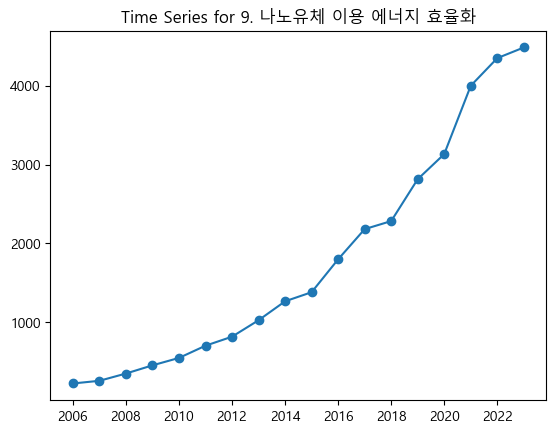

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


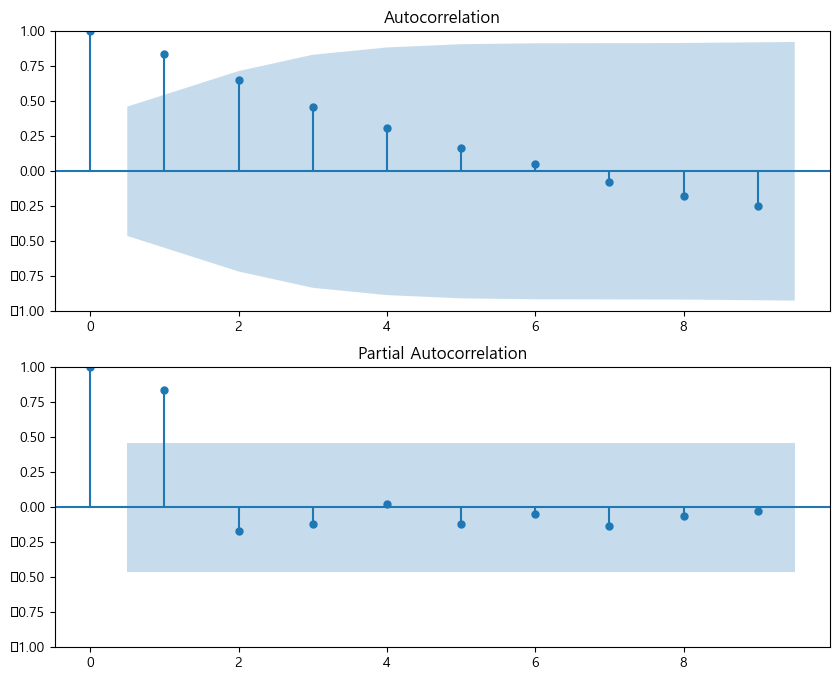

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

ARIMA model summary for 9. 나노유체 이용 에너지 효율화:
                               SARIMAX Results                                
Dep. Variable:                 Papers   No. Observations:                   18
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -115.693
Date:                Wed, 05 Jun 2024   AIC                            245.386
Time:                        23:10:44   BIC                            251.218
Sample:                    01-01-2006   HQIC                           245.965
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5535      0.597     -0.927      0.354      -1.725       0.617
ar.L2          0.5537      0.371      1.491      0.136      -0.174       1.282
ar.L3   

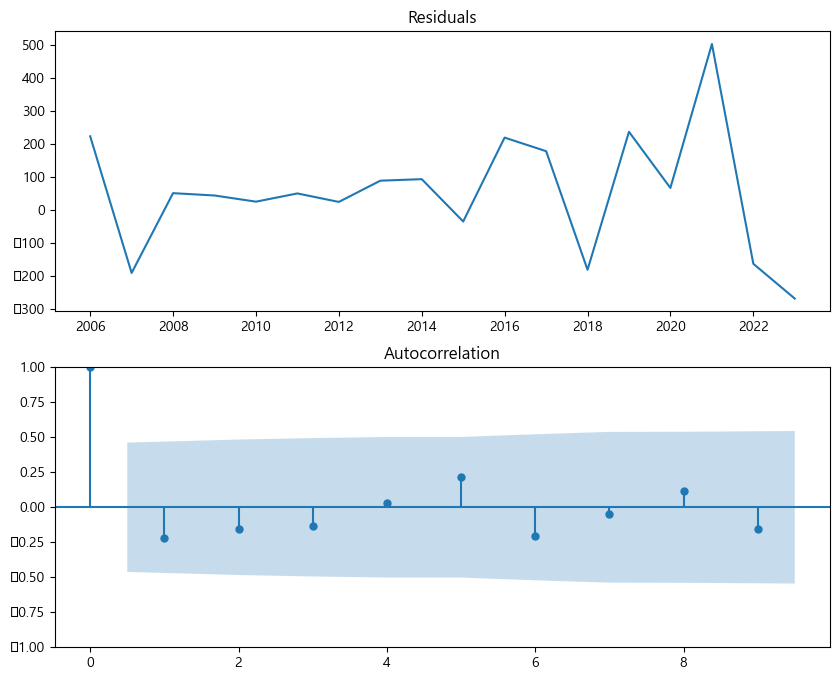

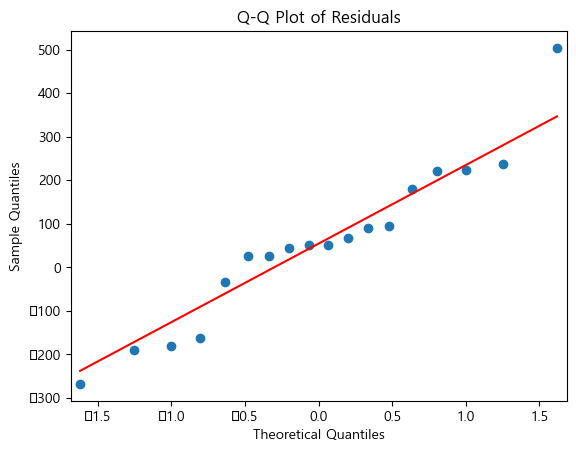

F:\Projtest\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


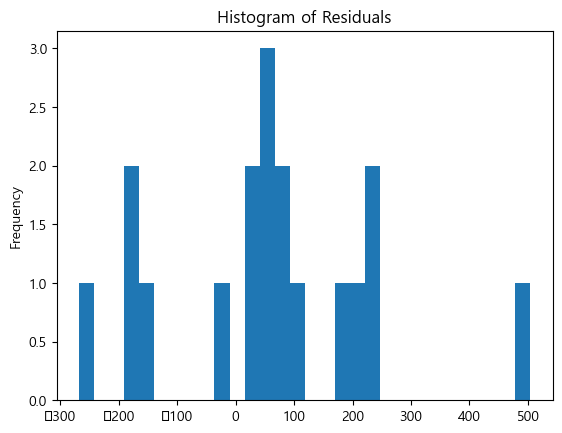

<Figure size 640x480 with 0 Axes>

In [32]:
# 서브플롯 행과 열의 개수 설정
num_dfs = len(df_year_only_dict)
num_cols = 3
num_rows = (num_dfs + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, (key, df) in enumerate(df_year_only_dict.items()):
    # pubyear로 그룹화하여 uid를 집계
    df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
    df_yearly.columns = ['Year', 'Papers']

    # years와 papers 추출
    years = df_yearly['Year'].values
    papers = df_yearly['Papers'].values

    # 데이터프레임 생성
    data = pd.DataFrame({'Year': years, 'Papers': papers})
    data.set_index('Year', inplace=True)

    # 인덱스가 날짜 형식이어야 하는 경우 처리
    data.index = pd.DatetimeIndex(data.index.astype(str) + '-01-01')

    # 데이터 시각화
    fig, ax = plt.subplots()
    ax.plot(data.index, data['Papers'], marker='o', linestyle='-')
    ax.set_title(f'Time Series for {key}')
    plt.show()

    # ACF, PACF 플롯
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(data['Papers'], ax=ax[0])
    plot_pacf(data['Papers'], ax=ax[1])
    plt.show()

    # ARIMA 모델 피팅
    order = (3, 1, 3)
    model = ARIMA(data['Papers'], order=order)
    fit_model = model.fit()

    # 모델 요약 출력
    print(f'ARIMA model summary for {key}:')
    print(fit_model.summary())

    # 잔차 분석
    residuals = fit_model.resid
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(residuals)
    ax[0].set_title('Residuals')
    plot_acf(residuals, ax=ax[1])
    plt.show()

    # 잔차의 Q-Q 플롯과 히스토그램
    sm.qqplot(residuals, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    residuals.plot(kind='hist', bins=30)
    plt.title('Histogram of Residuals')
    plt.show()

    # 미래 5년 예측
    forecast_years = 5
    forecast = fit_model.get_forecast(steps=forecast_years)
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='AS')

    # 예측값과 신뢰구간 얻기
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # 예측 결과를 데이터프레임으로 변환
    forecast_df = pd.DataFrame({'Year': forecast_index, 'Papers': forecast_mean})
    forecast_df.set_index('Year', inplace=True)

    # 플롯 위치 계산
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    # 예측 결과 시각화
    ax.plot(data.index.year, data['Papers'], label='Observed data', color='blue')
    ax.plot(forecast_df.index.year, forecast_df['Papers'], label='Forecast', color='red', linestyle='--')
    ax.fill_between(forecast_df.index.year, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Forecast for {key}')
    ax.legend()
    ax.grid(True)

# 남는 서브플롯 빈칸 제거
if num_dfs % num_cols != 0:
    for j in range(num_dfs, num_rows * num_cols):
        fig.delaxes(axs.flat[j])

plt.tight_layout()
plt.show()

In [33]:
# AIC, BIC 값을 비교하여 최적의 모델을 찾기 위한 다양한 차수의 모델 생성
import itertools

p = q = range(0, 6)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))

# 데이터 준비
key = '3. 휴먼 마이크로바이옴'  # 예시를 위해 '3. 휴먼 마이크로바이옴' 데이터프레임 사용
df = df_year_only_dict[key]
df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
df_yearly.columns = ['Year', 'Papers']
data = pd.DataFrame({'Year': df_yearly['Year'].values, 'Papers': df_yearly['Papers'].values})
data.set_index('Year', inplace=True)
data.index = pd.DatetimeIndex(data.index.astype(str) + '-01-01')

best_aic = np.inf
best_order = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(data['Papers'], order=param)
        temp_fit = temp_model.fit()
        temp_aic = temp_fit.aic
        if temp_aic < best_aic:
            best_aic = temp_aic
            best_order = param
            best_model = temp_fit
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(date

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-statio

Best ARIMA order: (3, 1, 0) with AIC: 245.8778468373462


F:\Projtest\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# AIC, BIC 값을 비교하여 최적의 모델을 찾기 위한 다양한 차수의 모델 생성
import itertools

p = q = range(0, 6)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))

# 데이터 준비
key = '3. 휴먼 마이크로바이옴'  # 예시를 위해 '3. 휴먼 마이크로바이옴' 데이터프레임 사용
df = df_year_only_dict[key]
df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
df_yearly.columns = ['Year', 'Papers']
data = pd.DataFrame({'Year': df_yearly['Year'].values, 'Papers': df_yearly['Papers'].values})
data.set_index('Year', inplace=True)
data.index = pd.DatetimeIndex(data.index.astype(str) + '-01-01')

best_aic = np.inf
best_order = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(data['Papers'], order=param)
        temp_fit = temp_model.fit()
        temp_aic = temp_fit.aic
        if temp_aic < best_aic:
            best_aic = temp_aic
            best_order = param
            best_model = temp_fit
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


In [34]:
import warnings

# 모든 경고를 무시
warnings.filterwarnings("ignore")
# 모든 경고를 다시 출력
#warnings.filterwarnings("default")

In [36]:
# 결과 확인
for key in df_year_only_dict.keys():
    p = q = range(0, 6)
    d = range(0, 2)
    pdq = list(itertools.product(p, d, q))

    # 데이터 준비
    key = key
    df = df_year_only_dict[key]
    df_yearly = df.groupby('pubyear')['uid'].count().reset_index()
    df_yearly.columns = ['Year', 'Papers']
    data = pd.DataFrame({'Year': df_yearly['Year'].values, 'Papers': df_yearly['Papers'].values})
    data.set_index('Year', inplace=True)
    data.index = pd.DatetimeIndex(data.index.astype(str) + '-01-01')

    best_aic = np.inf
    best_order = None
    best_model = None

    for param in pdq:
        try:
            temp_model = ARIMA(data['Papers'], order=param)
            temp_fit = temp_model.fit()
            temp_aic = temp_fit.aic
            if temp_aic < best_aic:
                best_aic = temp_aic
                best_order = param
                best_model = temp_fit
        except:
            continue

    print(f'for tech: {key}, Best ARIMA order: {best_order} with AIC: {best_aic}')

for tech: 1-1. 금속 3D 프린팅(A-set)3, Best ARIMA order: (1, 1, 0) with AIC: 96.31828262080616
for tech: 1-1. 금속 3D 프린팅(A-set)gpt, Best ARIMA order: (1, 1, 3) with AIC: 184.42166320309553
for tech: 1-1. 금속 3D 프린팅(A-set)gpt_smaller, Best ARIMA order: (1, 1, 0) with AIC: 77.79078993033164
for tech: 1-2. 금속 3D 프린팅(B-set)gpt, Best ARIMA order: (1, 1, 0) with AIC: 134.53940482377809
for tech: 1-2. 금속 3D 프린팅(B-set), Best ARIMA order: (1, 1, 1) with AIC: 164.61271720462244
for tech: 10. 상변화 소재 활용 열에너지 저장, Best ARIMA order: (1, 1, 2) with AIC: 221.75867718776436
for tech: 2. 신축성 전자소자, Best ARIMA order: (1, 1, 2) with AIC: 251.49601964583107
for tech: 3. 휴먼 마이크로바이옴, Best ARIMA order: (3, 1, 0) with AIC: 245.8778468373462
for tech: 4. 암 진단_예측 바이오마커, Best ARIMA order: (0, 1, 2) with AIC: 278.27400095307667
for tech: 5. 유전자 편집, Best ARIMA order: (2, 0, 5) with AIC: 40.26776493694996
for tech: 6.무선 전력 전송, Best ARIMA order: (3, 1, 0) with AIC: 187.24823244556825
for tech: 7. 초대용량 데이터 대응 광통신 기술, Best ARIM

In [6]:
# 초기 파라미터 설정 (데이터에 맞게 조정)
initial_logistic_params = [max(papers)*1.1, np.median(years), 0.1]
initial_gompertz_params = [max(papers)*1.1, 1, 0.1]

# 최대 함수 호출 수 증가
maxfev = 10000

In [12]:
# 곡선 피팅
logistic_params, logistic_covariance = curve_fit(logistic_function, years, papers, p0=initial_logistic_params, maxfev=maxfev, method='trf')
gompertz_params, gompertz_covariance = curve_fit(gompertz_function, years, papers, p0=initial_gompertz_params, maxfev=maxfev, method='trf')

In [13]:
# 피팅 결과 출력
print(f'Logistic parameters: {logistic_params}')
print(f'Gompertz parameters: {gompertz_params}')

Logistic parameters: [4.88487998e+02 2.01198015e+03 4.60556402e-01]
Gompertz parameters: [1.57604746e+02 1.00000000e+00 1.00000000e-01]


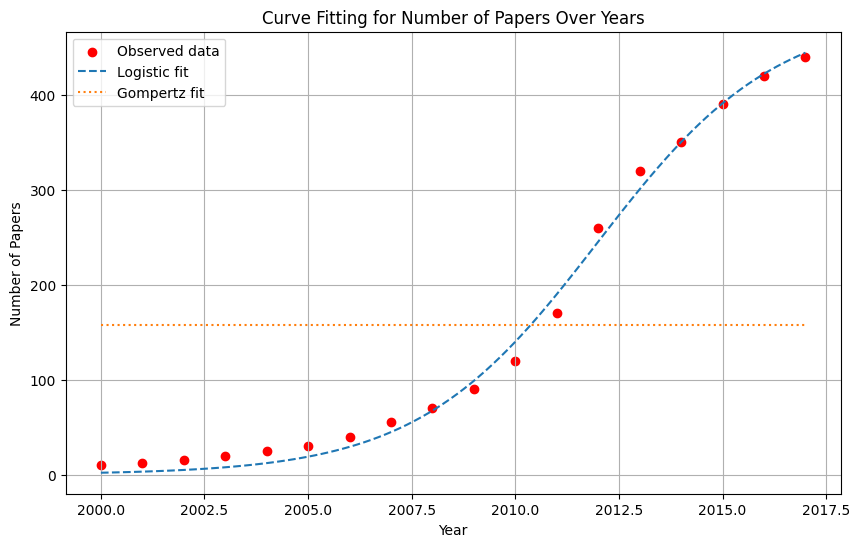

In [14]:
# 피팅 곡선 그리기
years_fit = np.linspace(min(years), max(years), 100)
papers_logistic_fit = logistic_function(years_fit, *logistic_params)
papers_gompertz_fit = gompertz_function(years_fit, *gompertz_params)

plt.figure(figsize=(10, 6))
plt.scatter(years, papers, label='Observed data', color='red')
plt.plot(years_fit, papers_logistic_fit, label='Logistic fit', linestyle='--')
plt.plot(years_fit, papers_gompertz_fit, label='Gompertz fit', linestyle=':')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Curve Fitting for Number of Papers Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from statsmodels.tsa.arima.model import ARIMA

F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Projtest\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\Projtest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

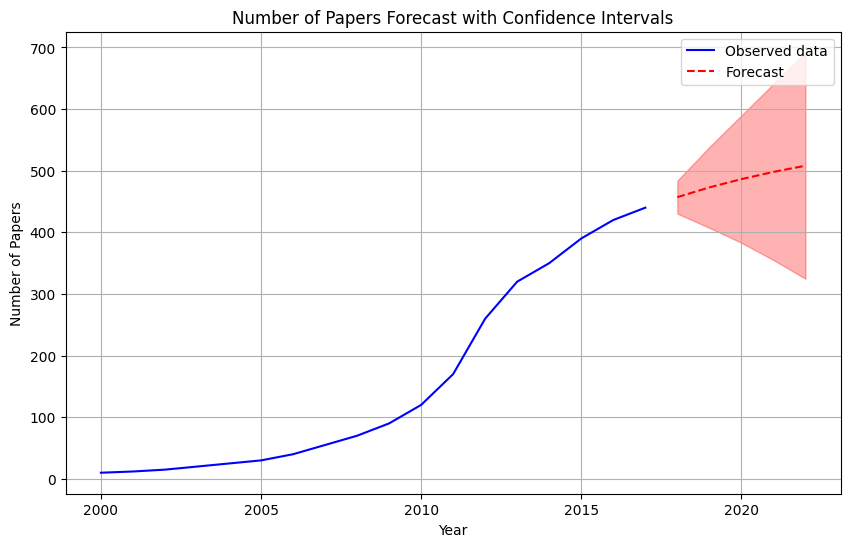

In [21]:
# 데이터프레임 생성
data = pd.DataFrame({'Year': years, 'Papers': papers})
data.set_index('Year', inplace=True)

# ARIMA 모델 피팅
model = ARIMA(data, order=(2, 1, 2))  # p, d, q 값은 데이터에 따라 조정 가능
fit_model = model.fit()

# 미래 5년 예측
forecast_years = 5
forecast = fit_model.get_forecast(steps=forecast_years)
forecast_index = np.arange(data.index[-1] + 1, data.index[-1] + 1 + forecast_years)

# 예측값과 신뢰구간 얻기
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 예측 결과를 데이터프레임으로 변환
forecast_df = pd.DataFrame({'Year': forecast_index, 'Papers': forecast_mean})
forecast_df.set_index('Year', inplace=True)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Papers'], label='Observed data', color='blue')
plt.plot(forecast_df.index, forecast_df['Papers'], label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()